In [237]:
!curl -o 'covid.csv' 'https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv'


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5383k  100 5383k    0     0  3031k      0  0:00:01  0:00:01 --:--:-- 3031k


In [460]:
import pandas as pd

In [462]:
df = pd.read_csv('covid.csv')

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       161568 non-null  object
 1   Country    161568 non-null  object
 2   Confirmed  161568 non-null  int64 
 3   Recovered  161568 non-null  int64 
 4   Deaths     161568 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.2+ MB


In [466]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [468]:
unq = df.Country.unique()
print("count = ",len(unq))
for i in unq:
    print(i, end = " | ")

count =  198
Afghanistan | Albania | Algeria | Andorra | Angola | Antarctica | Antigua and Barbuda | Argentina | Armenia | Australia | Austria | Azerbaijan | Bahamas | Bahrain | Bangladesh | Barbados | Belarus | Belgium | Belize | Benin | Bhutan | Bolivia | Bosnia and Herzegovina | Botswana | Brazil | Brunei | Bulgaria | Burkina Faso | Burma | Burundi | Cabo Verde | Cambodia | Cameroon | Canada | Central African Republic | Chad | Chile | China | Colombia | Comoros | Congo (Brazzaville) | Congo (Kinshasa) | Costa Rica | Cote d'Ivoire | Croatia | Cuba | Cyprus | Czechia | Denmark | Diamond Princess | Djibouti | Dominica | Dominican Republic | Ecuador | Egypt | El Salvador | Equatorial Guinea | Eritrea | Estonia | Eswatini | Ethiopia | Fiji | Finland | France | Gabon | Gambia | Georgia | Germany | Ghana | Greece | Grenada | Guatemala | Guinea | Guinea-Bissau | Guyana | Haiti | Holy See | Honduras | Hungary | Iceland | India | Indonesia | Iran | Iraq | Ireland | Israel | Italy | Jamaica | 

In [470]:
print("Total Deths = ", f"{df.Deaths.sum():,}")

Total Deths =  2,261,860,890


In [472]:
df['Deaths'].describe()

count    161568.000000
mean      13999.436089
std       59113.581271
min           0.000000
25%          17.000000
50%         365.000000
75%        4509.000000
max      988609.000000
Name: Deaths, dtype: float64

In [474]:
country_list = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Anguilla", "Antigua &amp; Barbuda", "Argentina", "Armenia", "Aruba", "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin", "Bermuda", "Bhutan", "Bolivia", "Bosnia &amp; Herzegovina", "Botswana", "Brazil", "British Virgin Islands", "Brunei", "Bulgaria", "Burkina Faso", "Burundi", "Cambodia", "Cameroon", "Cape Verde", "Cayman Islands", "Chad", "Chile", "China", "Colombia", "Congo", "Cook Islands", "Costa Rica", "Cote D Ivoire", "Croatia", "Cruise Ship", "Cuba", "Cyprus", "Czech Republic", "Denmark", "Djibouti", "Dominica", "Dominican Republic", "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", "Estonia", "Ethiopia", "Falkland Islands", "Faroe Islands", "Fiji", "Finland", "France", "French Polynesia", "French West Indies", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Gibraltar", "Greece", "Greenland", "Grenada", "Guam", "Guatemala", "Guernsey", "Guinea", "Guinea Bissau", "Guyana", "Haiti", "Honduras", "Hong Kong", "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Isle of Man", "Israel", "Italy", "Jamaica", "Japan", "Jersey", "Jordan", "Kazakhstan", "Kenya", "Kuwait", "Kyrgyz Republic", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Macau", "Macedonia", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Mauritania", "Mauritius", "Mexico", "Moldova", "Monaco", "Mongolia", "Montenegro", "Montserrat", "Morocco", "Mozambique", "Namibia", "Nepal", "Netherlands", "Netherlands Antilles", "New Caledonia", "New Zealand", "Nicaragua", "Niger", "Nigeria", "Norway", "Oman", "Pakistan", "Palestine", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Puerto Rico", "Qatar", "Reunion", "Romania", "Russia", "Rwanda", "Saint Pierre &amp; Miquelon", "Samoa", "San Marino", "Saudi Arabia", "Senegal", "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "South Africa", "South Korea", "Spain", "Sri Lanka", "St Kitts &amp; Nevis", "St Lucia", "St Vincent", "St. Lucia", "Sudan", "Suriname", "Swaziland", "Sweden", "Switzerland", "Syria", "Taiwan", "Tajikistan", "Tanzania", "Thailand", "Timor L'Este", "Togo", "Tonga", "Trinidad &amp; Tobago", "Tunisia", "Turkey", "Turkmenistan", "Turks &amp; Caicos", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom", "Uruguay", "Uzbekistan", "Venezuela", "Vietnam", "Virgin Islands (US)", "Yemen", "Zambia", "Zimbabwe",
    "North Macedonia", "Comoros", "Saint Lucia", "Saint Vincent and the Grenadines", "Vanuatu", "Eritrea", "Cabo Verde", "Congo (Kinshasa)", "Congo (Brazzaville)", "Solomon Islands", "Central African Republic", "Timor-Leste", "Somalia", "South Sudan", "Kiribati", "Burma", "Korea, South", "Kyrgyzstan", "Antigua and Barbuda", "Bosnia and Herzegovina", "Trinidad and Tobago", "Kosovo", "Guinea-Bissau", "Marshall Islands", "Eswatini", "Sao Tome and Principe", "Czechia", "Micronesia", "Canada", "Saint Kitts and Nevis", "Palau","US","Taiwan*"
]


In [476]:
not_valid_country = set()
for i in range(len(df['Country'])):
    value = df['Country'][i]
    if value not in country_list:
        not_valid_country.add(value)

In [478]:
print("total count:", len(not_valid_country))
print(not_valid_country)

total count: 8
{'Diamond Princess', 'MS Zaandam', 'Antarctica', "Cote d'Ivoire", 'West Bank and Gaza', 'Holy See', 'Summer Olympics 2020', 'Winter Olympics 2022'}


In [480]:
print("valid countries:", 198 - 8)

valid countries: 190


In [482]:
fdf = df[~df['Country'].isin(not_valid_country)]

In [484]:
print("Total Recovered = ", f"{fdf.Recovered.sum():,}")

Total Recovered =  23,421,741,347


In [486]:
print("Total Deths = ", f"{fdf.Deaths.sum():,}")

Total Deths =  2,259,705,074


In [488]:
unq = fdf.Country.unique()
print("count = ",len(unq))
for i in unq:
    print(i, end = " | ")

count =  190
Afghanistan | Albania | Algeria | Andorra | Angola | Antigua and Barbuda | Argentina | Armenia | Australia | Austria | Azerbaijan | Bahamas | Bahrain | Bangladesh | Barbados | Belarus | Belgium | Belize | Benin | Bhutan | Bolivia | Bosnia and Herzegovina | Botswana | Brazil | Brunei | Bulgaria | Burkina Faso | Burma | Burundi | Cabo Verde | Cambodia | Cameroon | Canada | Central African Republic | Chad | Chile | China | Colombia | Comoros | Congo (Brazzaville) | Congo (Kinshasa) | Costa Rica | Croatia | Cuba | Cyprus | Czechia | Denmark | Djibouti | Dominica | Dominican Republic | Ecuador | Egypt | El Salvador | Equatorial Guinea | Eritrea | Estonia | Eswatini | Ethiopia | Fiji | Finland | France | Gabon | Gambia | Georgia | Germany | Ghana | Greece | Grenada | Guatemala | Guinea | Guinea-Bissau | Guyana | Haiti | Honduras | Hungary | Iceland | India | Indonesia | Iran | Iraq | Ireland | Israel | Italy | Jamaica | Japan | Jordan | Kazakhstan | Kenya | Kiribati | Korea, Sou

In [490]:
fdf.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [491]:
import pandas.core.groupby as gb  # Import groupby alias for readability

# Assuming your DataFrame is named 'df'
country_data = fdf.groupby('Country')[['Deaths', 'Recovered', 'Confirmed']].sum()

# Print the result
for country, row in country_data.iterrows():
  confirmed, deaths, recovered = row  # Unpack row values
  print(f"Country: {country}")
  print(f"\tTotal Confirmed Cases: {confirmed}")
  print(f"\tTotal Deaths: {deaths}")
  print(f"\tTotal Recovered: {recovered}")
  print("-"*20)  # Optional separator between countries


Country: Afghanistan
	Total Confirmed Cases: 2874099
	Total Deaths: 18289880
	Total Recovered: 66031705
--------------------
Country: Albania
	Total Confirmed Cases: 1320658
	Total Deaths: 22652652
	Total Recovered: 82385140
--------------------
Country: Algeria
	Total Confirmed Cases: 2651996
	Total Deaths: 25670233
	Total Recovered: 94695072
--------------------
Country: Andorra
	Total Confirmed Cases: 75889
	Total Deaths: 3085649
	Total Recovered: 9598486
--------------------
Country: Angola
	Total Confirmed Cases: 605294
	Total Deaths: 5895800
	Total Recovered: 26425596
--------------------
Country: Antigua and Barbuda
	Total Confirmed Cases: 33325
	Total Deaths: 191813
	Total Recovered: 1434165
--------------------
Country: Argentina
	Total Confirmed Cases: 48636217
	Total Deaths: 711610324
	Total Recovered: 2475895186
--------------------
Country: Armenia
	Total Confirmed Cases: 2869082
	Total Deaths: 51634388
	Total Recovered: 142807219
--------------------
Country: Australia
	T

In [492]:
import pandas as pd

def is_valid_date(date_string):
  
  try:
    date_object = pd.to_datetime(date_string, format='%Y-%m-%d')
    min_date = pd.to_datetime('2020-01-01')
    max_date = pd.to_datetime('2022-04-16')
    return min_date <= date_object <= max_date
  except ValueError:
    return False

data = df['Date']
arr = []
for d, row in country_data.iterrows():
    if is_valid_date(d):
        arr.append(d)
print(arr)

[]


In [496]:
print(df['Date'].min(), df['Date'].max())

2020-01-22 2022-04-16


0 for Confirmed Cases (Descending) 1 for Deaths (Descending) 2 for Recovered (Descending) 3 for Deaths+Recovered (Descending)


Enter sort by (0, 1, 2, or 3):  2


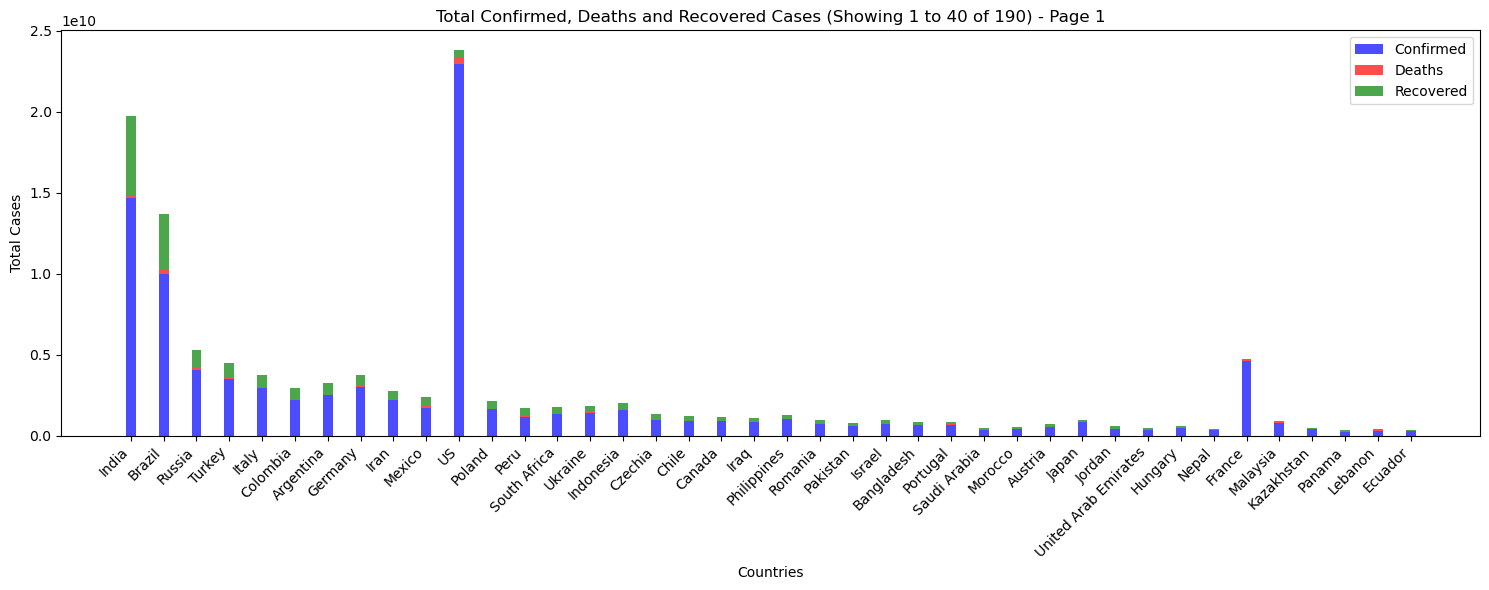

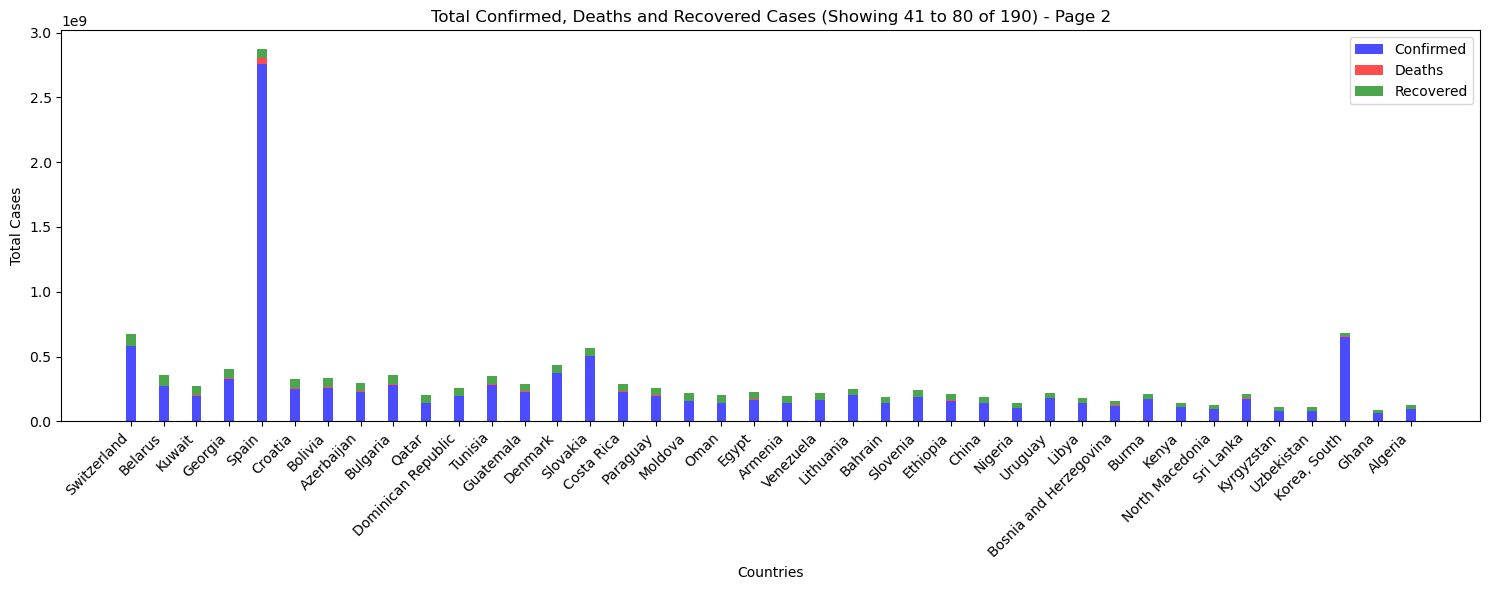

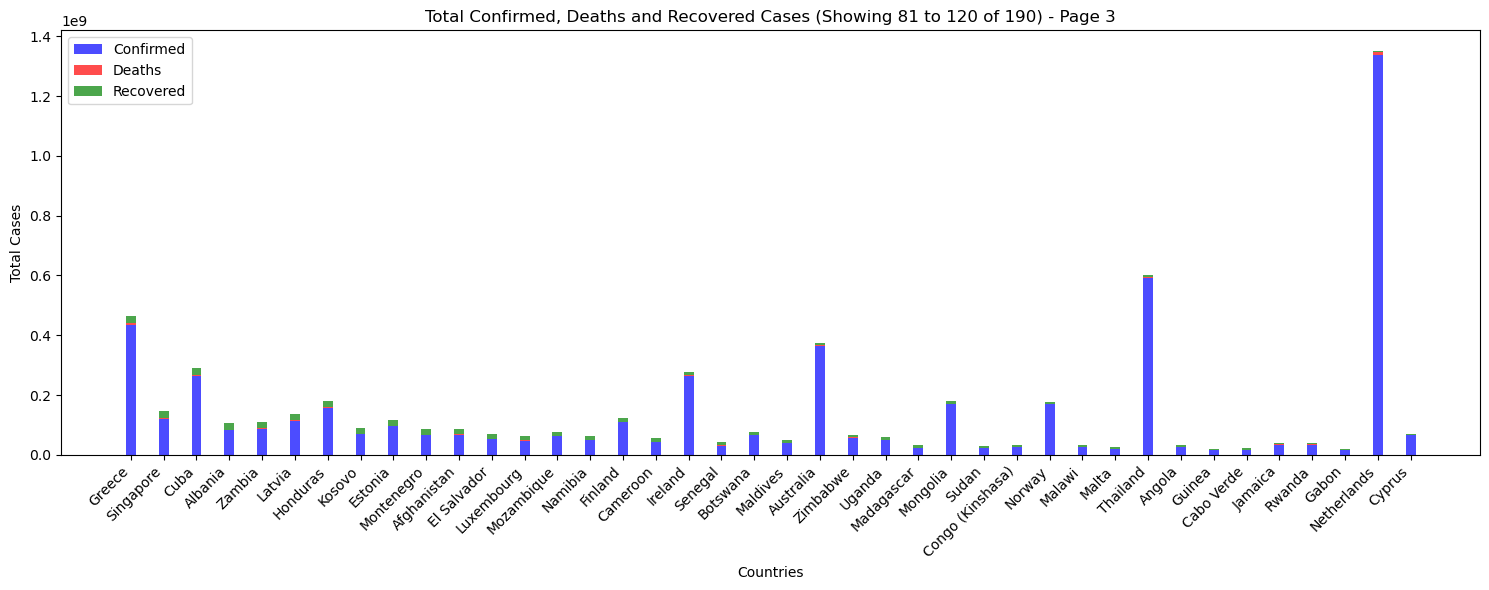

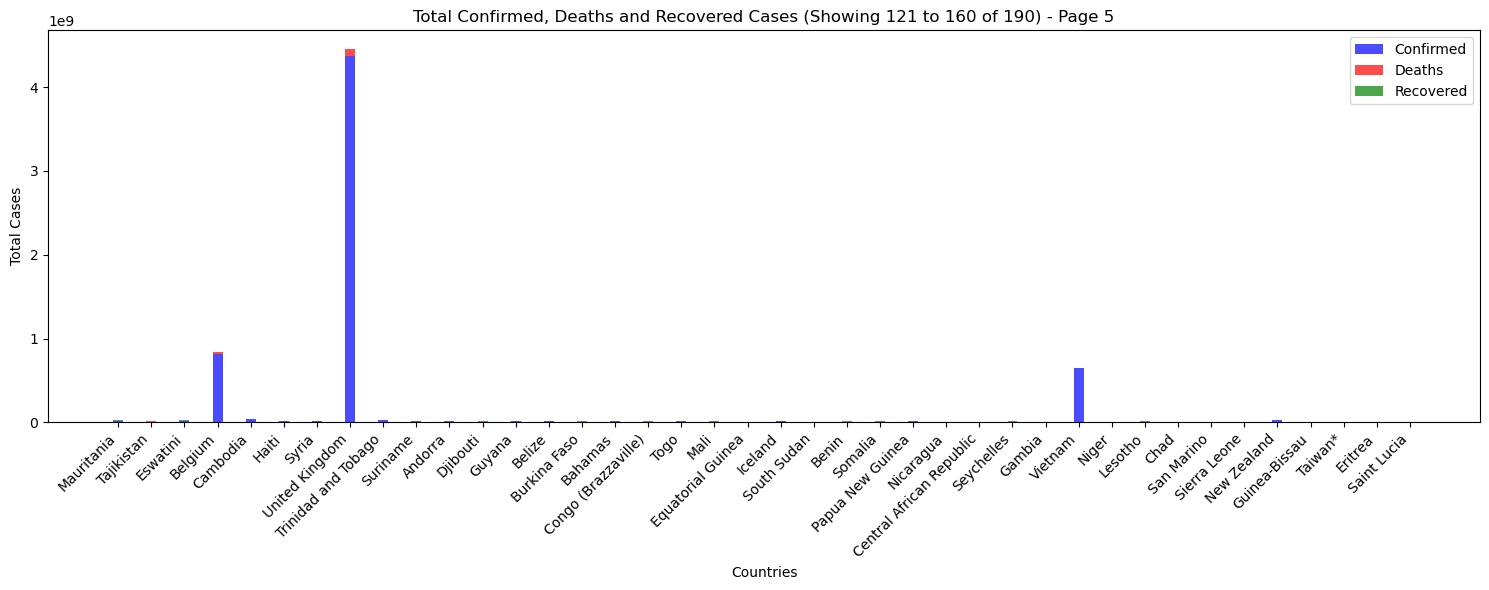

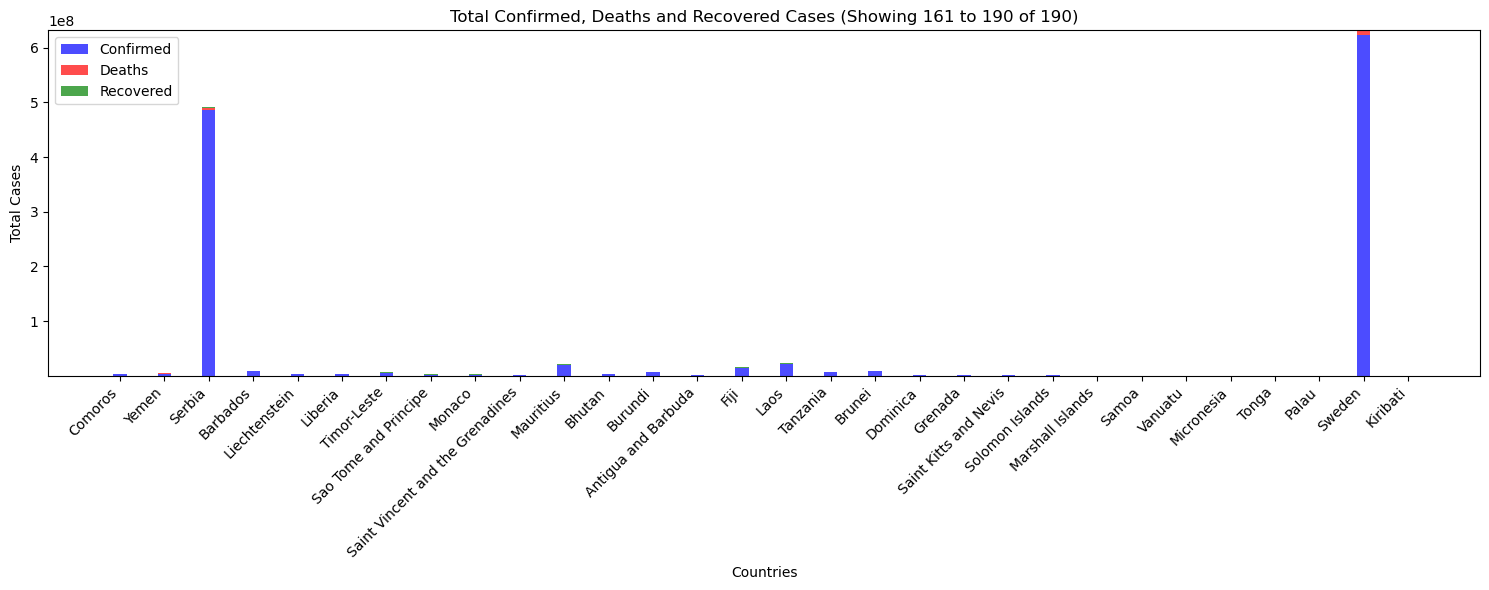

In [500]:
import pandas as pd
import matplotlib.pyplot as plt

total_countries = len(country_data)

print("0 for Confirmed Cases (Descending)", "1 for Deaths (Descending)", "2 for Recovered (Descending)", "3 for Deaths+Recovered (Descending)")
input_ = input("Enter sort by (0, 1, 2, or 3): ")

if input_ == '0':
  sorted_data = country_data.sort_values(by='Confirmed', ascending=False)
elif input_ == '1':
  sorted_data = country_data.sort_values(by='Deaths', ascending=False)
elif input_ == '2':
  sorted_data = country_data.sort_values(by='Recovered', ascending=False)
elif input_ == '3':
  # Sort by sum of Deaths and Recovered (descending)
  sorted_data = country_data.assign(Total=lambda x: x['Deaths'] + x['Recovered']).sort_values(by='Total', ascending=False).drop('Total', axis=1)
else:
  print("Invalid input. Please enter 0, 1, 2, or 3.")
  exit()  # Exit the program if invalid input

def plot_page(data, start_index, end_index):
  countries = data.index[start_index:end_index].to_list()
  deaths = data['Deaths'][start_index:end_index].to_list()
  recovered = data['Recovered'][start_index:end_index].to_list()
  confirmed = data['Confirmed'][start_index:end_index].to_list()

  plt.figure(figsize=(15, 6))  # Increased figure size for better visualization
  plt.bar(countries, confirmed, label='Confirmed', width=0.3, color='blue', alpha=0.7)  # Adjust alpha for transparency
  plt.bar(countries, deaths, label='Deaths', width=0.3, bottom=confirmed, color='red', alpha=0.7)
  plt.bar(countries, recovered, label='Recovered', width=0.3, bottom=[confirmed[i] + deaths[i] for i in range(len(confirmed))], color='green', alpha=0.7)
  plt.xlabel('Countries')
  plt.ylabel('Total Cases')

  if end_index == total_countries:
    title = f'Total Confirmed, Deaths and Recovered Cases (Showing {start_index+1} to {end_index} of {total_countries})'
  else:
    title = f'Total Confirmed, Deaths and Recovered Cases (Showing {start_index+1} to {end_index} of {total_countries}) - Page {int((start_index+1) / 30) + 1}'
  plt.title(title)

  plt.xticks(rotation=45, ha='right')
  plt.legend()
  plt.tight_layout()

plot_page(sorted_data, 0, 40)  # Initial plot with first 30 countries
plt.show()

start_index = 40
while start_index < total_countries:
  end_index = min(start_index + 40, total_countries)
  plot_page(sorted_data, start_index, end_index)
  start_index = end_index
  plt.show()


In [324]:

print(fdf['Date'].dtype)
fdf.loc[:, 'Date'] = pd.to_datetime(fdf['Date'])
print(fdf['Date'].dtype)


object
object


In [326]:
import pandas as pd
import numpy as np

numerical_cols = ['Recovered', 'Deaths', 'Confirmed']

for col in numerical_cols:
  # Calculate standard deviation
  std_val = np.std(fdf[col])

  # Calculate absolute z-scores
  z_scores = np.abs(std_val) * (fdf[col] - fdf[col].mean())

  # Identify outliers (absolute z-score > 3)
  outliers = fdf[z_scores > 3].index
  print("Potential outliers in", col, len(outliers.tolist()))


Potential outliers in Recovered 18199
Potential outliers in Deaths 22076
Potential outliers in Confirmed 21798


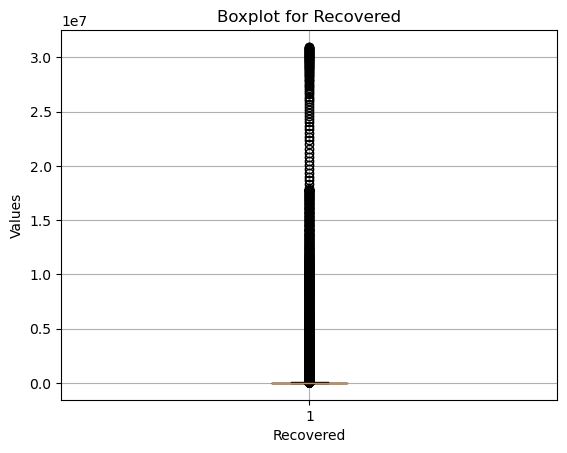

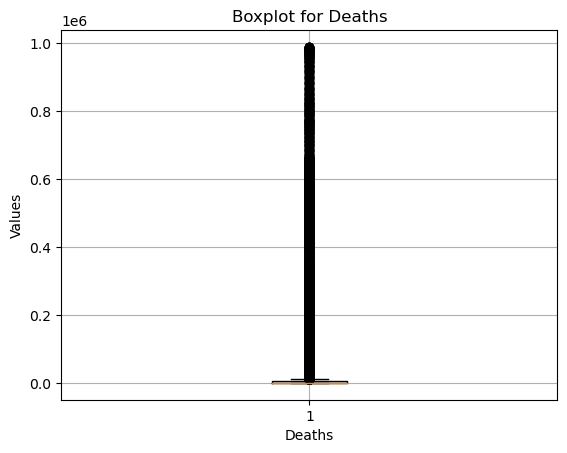

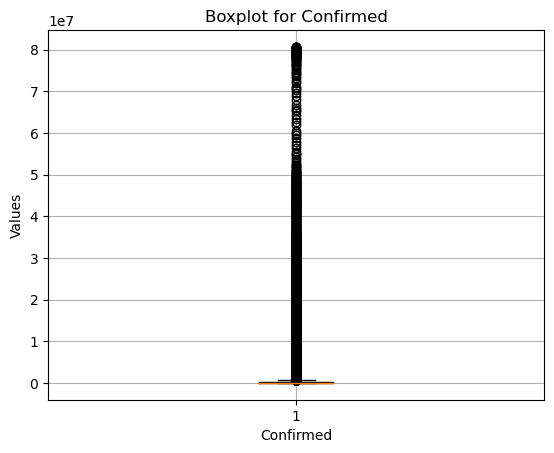

In [328]:
import pandas as pd
import matplotlib.pyplot as plt

numerical_cols = ['Recovered', 'Deaths', 'Confirmed']

for col in numerical_cols:
  # Create a boxplot
  plt.figure()
  plt.boxplot(fdf[col])
  plt.title(f"Boxplot for {col}")
  plt.xlabel(col)
  plt.ylabel('Values')
  plt.grid(True)
  plt.show()


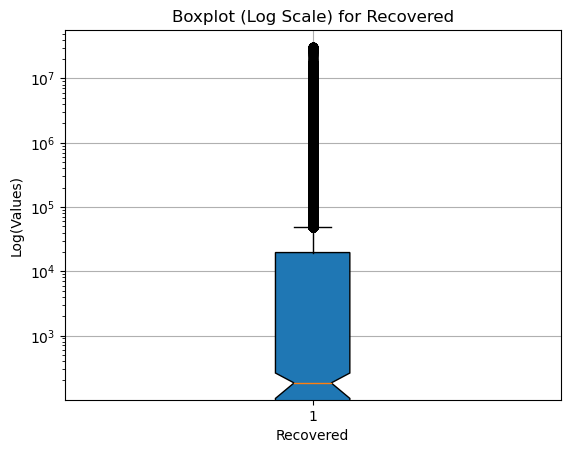

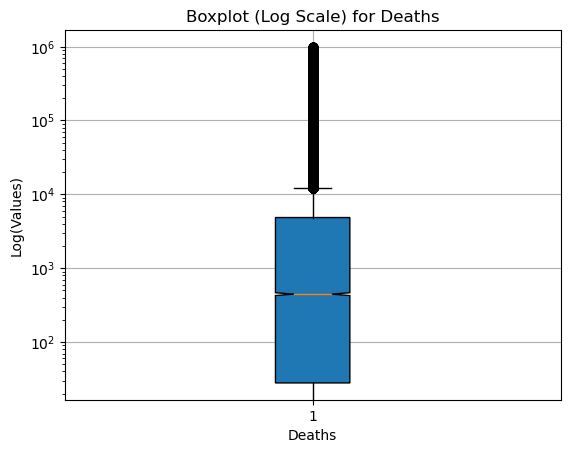

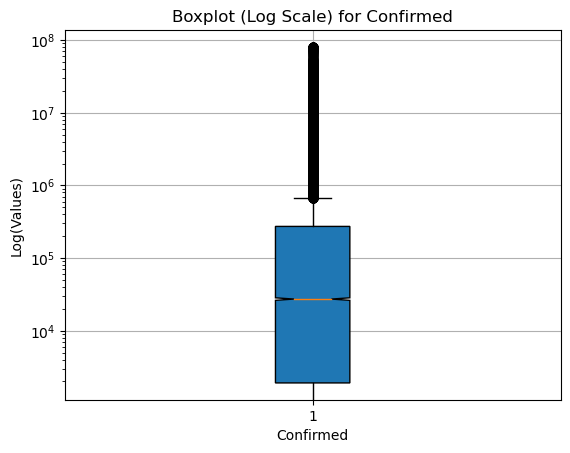

In [330]:
import pandas as pd
import matplotlib.pyplot as plt

numerical_cols = ['Recovered', 'Deaths', 'Confirmed']

for col in numerical_cols:
  # Create a boxplot with logarithmic scale
  plt.figure()
  plt.boxplot(fdf[col], notch=True, patch_artist=True, vert=True, showfliers=True)

  # Logarithmic scale on y-axis
  plt.yscale('log')

  plt.title(f"Boxplot (Log Scale) for {col}")
  plt.xlabel(col)
  plt.ylabel('Log(Values)')
  plt.grid(True)
  plt.show()


In [257]:
import pandas as pd
import numpy as np

numerical_cols = ['Recovered', 'Deaths', 'Confirmed']
z_score_threshold = 3  # You can adjust this threshold as needed

for col in numerical_cols:
  # Calculate standard deviation
  std_val = np.std(fdf[col])

  # Calculate absolute z-scores
  z_scores = np.abs(std_val) * (fdf[col] - fdf[col].mean())

  # Identify outliers (absolute z-score > 3)
  outliers = fdf[z_scores > z_score_threshold].index

  # Remove outliers directly from fdf
  fdf.drop(outliers, inplace=True)


/var/folders/kj/m99rpp7n6rd2xrtxt70rft7m0000gn/T/ipykernel_11623/2816976449.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf.drop(outliers, inplace=True)


In [352]:
import pandas as pd

numerical_cols = ['Recovered', 'Deaths', 'Confirmed']

def remove_outliers_iqr(df, numerical_cols):
  """
  Removes outliers from a DataFrame based on Interquartile Range (IQR) for numerical columns.

  Args:
      df (pd.DataFrame): The DataFrame to remove outliers from (modified in-place).
      numerical_cols (list): A list of column names containing numerical data.

  Returns:
      None (modifies the input DataFrame directly).
  """

  for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers based on IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Drop outliers directly from fdf
    df.drop(outliers.index, inplace=True)

    # Print information about outliers (optional)
    print(f"Removed {len(outliers)} outliers in '{col}' based on IQR.")

# Example usage
remove_outliers_iqr(fdf, numerical_cols)  # Modify fdf directly

# fdf now contains the DataFrame with outliers removed


Removed 30211 outliers in 'Recovered' based on IQR.
Removed 22953 outliers in 'Deaths' based on IQR.
Removed 12671 outliers in 'Confirmed' based on IQR.


/var/folders/kj/m99rpp7n6rd2xrtxt70rft7m0000gn/T/ipykernel_11623/2385620349.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(outliers.index, inplace=True)
/var/folders/kj/m99rpp7n6rd2xrtxt70rft7m0000gn/T/ipykernel_11623/2385620349.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(outliers.index, inplace=True)
/var/folders/kj/m99rpp7n6rd2xrtxt70rft7m0000gn/T/ipykernel_11623/2385620349.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

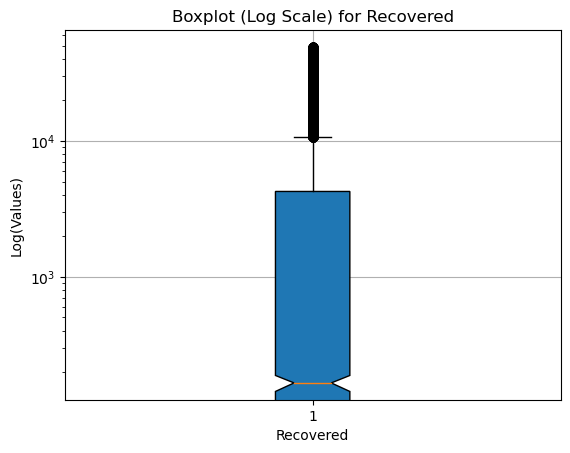

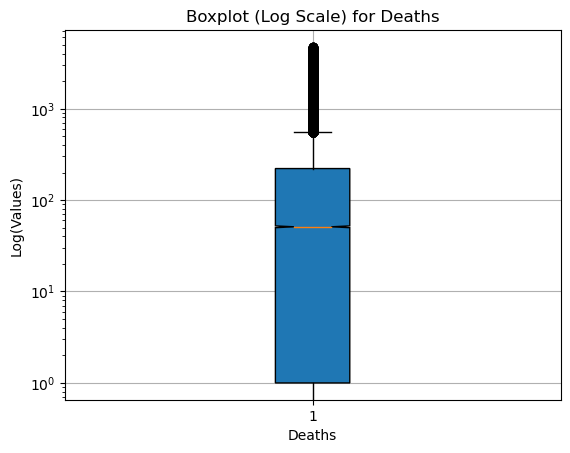

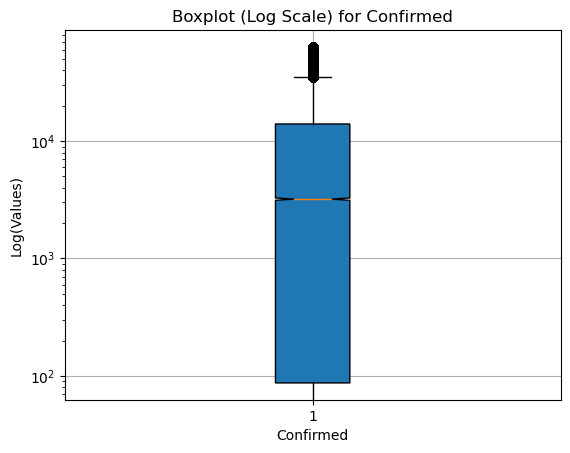

In [354]:
import pandas as pd
import matplotlib.pyplot as plt

numerical_cols = ['Recovered', 'Deaths', 'Confirmed']

for col in numerical_cols:
  # Create a boxplot with logarithmic scale
  plt.figure()
  plt.boxplot(fdf[col], notch=True, patch_artist=True, vert=True, showfliers=True)

  # Logarithmic scale on y-axis
  plt.yscale('log')

  plt.title(f"Boxplot (Log Scale) for {col}")
  plt.xlabel(col)
  plt.ylabel('Log(Values)')
  plt.grid(True)
  plt.show()


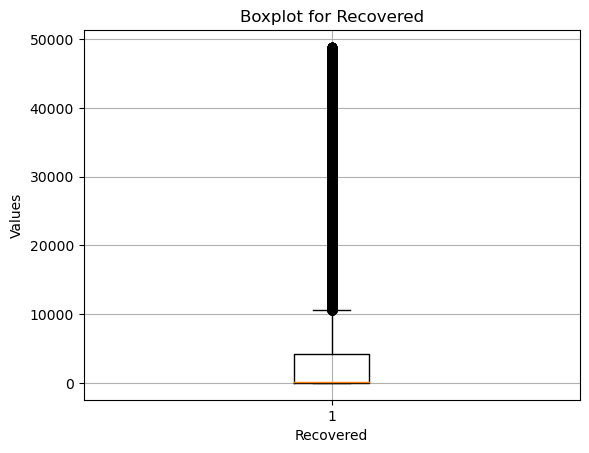

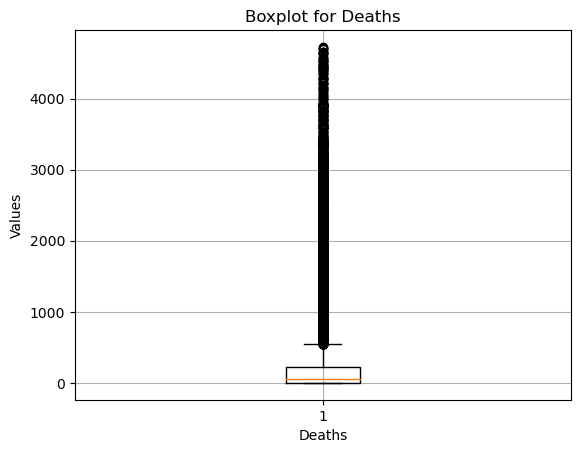

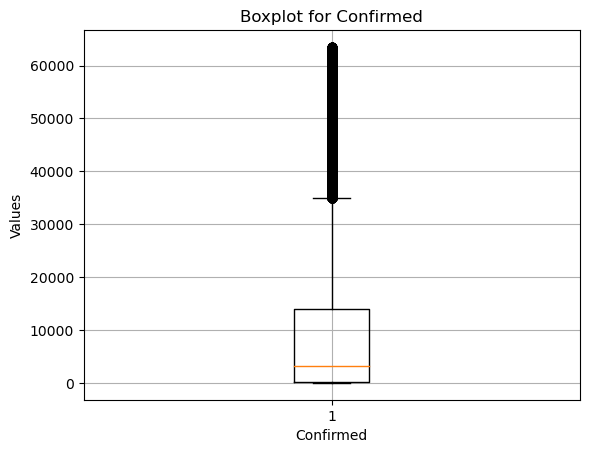

In [356]:
import pandas as pd
import matplotlib.pyplot as plt

numerical_cols = ['Recovered', 'Deaths', 'Confirmed']

for col in numerical_cols:
  # Create a boxplot
  plt.figure()
  plt.boxplot(fdf[col])
  plt.title(f"Boxplot for {col}")
  plt.xlabel(col)
  plt.ylabel('Values')
  plt.grid(True)
  plt.show()


In [358]:
print("Total Deths = ", f"{fdf.Deaths.sum():,}")

Total Deths =  20,469,897


In [360]:
print("Total Recovered = ", f"{fdf.Recovered.sum():,}")

Total Recovered =  394,325,031


0 for Confirmed Cases (Descending) 1 for Deaths (Descending) 2 for Recovered (Descending) 3 for Deaths+Recovered (Descending)


Enter sort by (0, 1, 2, or 3):  1


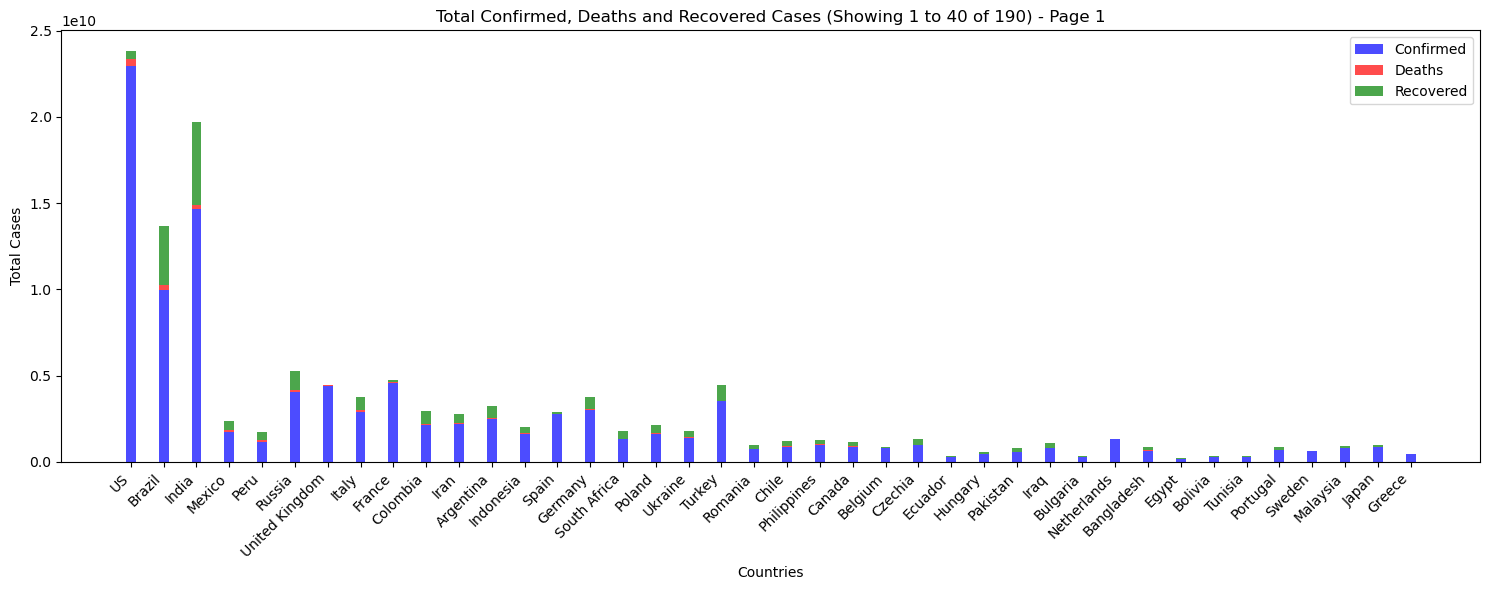

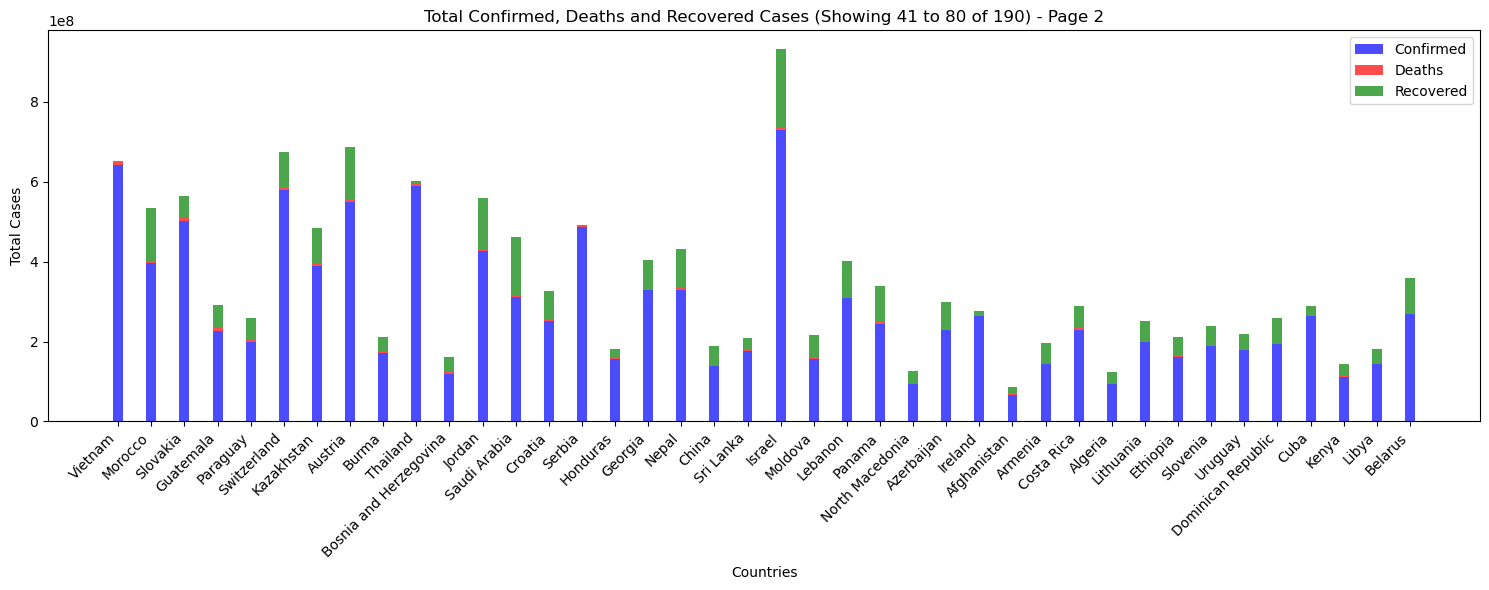

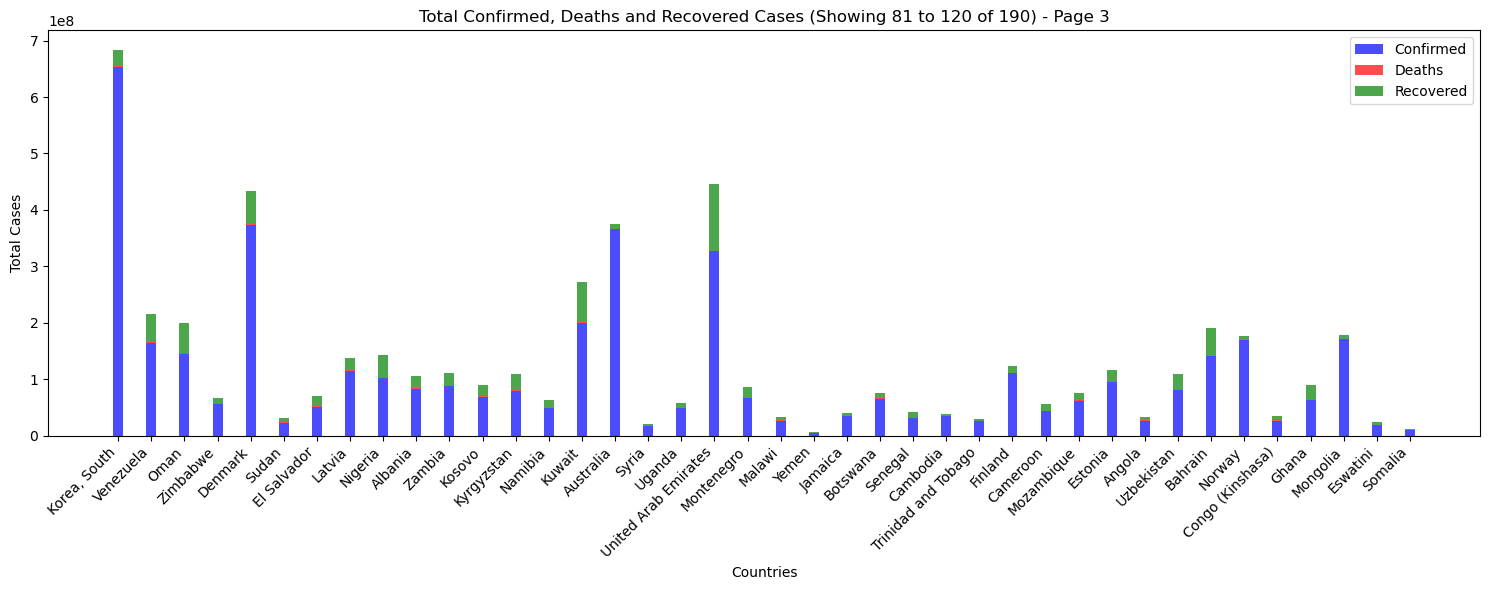

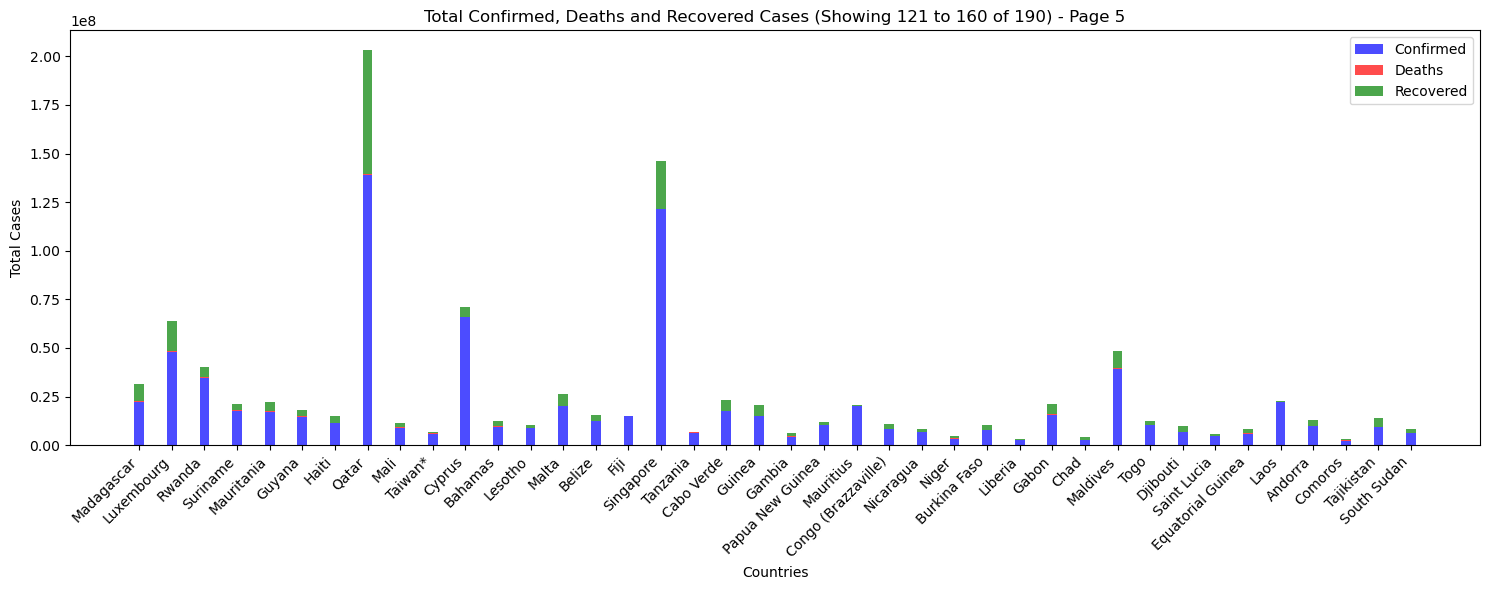

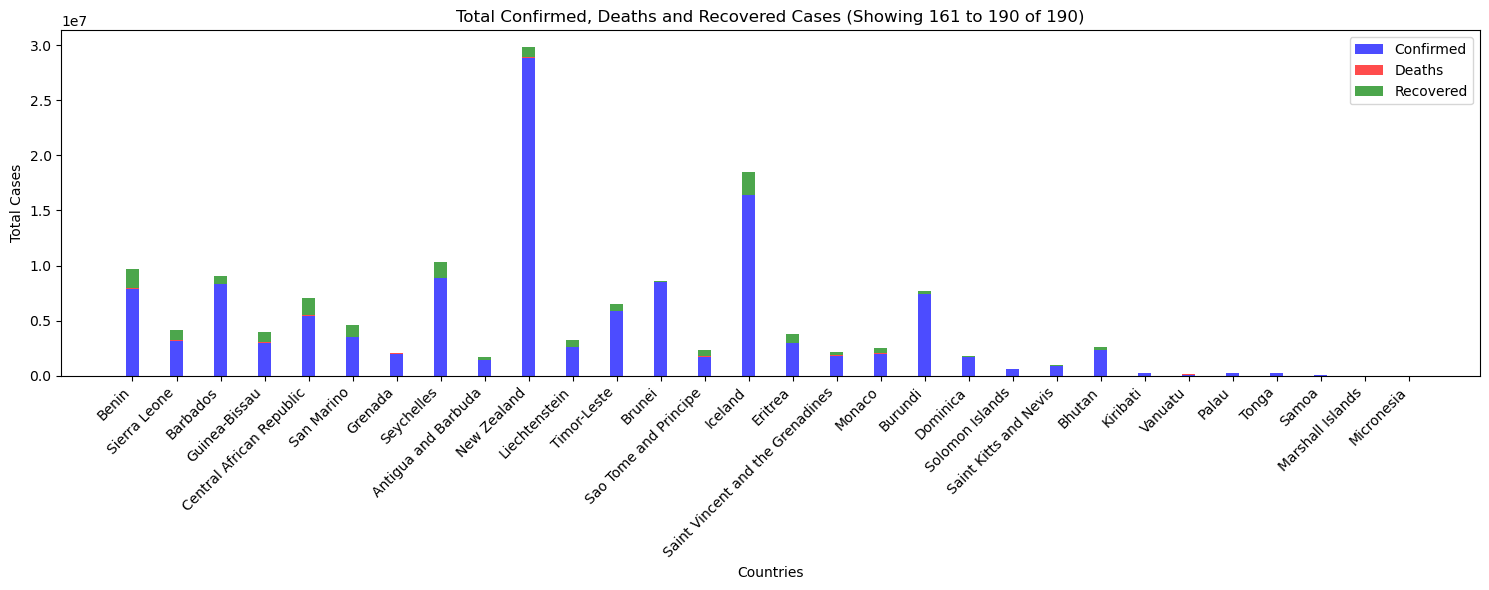

In [502]:
import pandas as pd
import matplotlib.pyplot as plt

total_countries = len(country_data)

print("0 for Confirmed Cases (Descending)", "1 for Deaths (Descending)", "2 for Recovered (Descending)", "3 for Deaths+Recovered (Descending)")
input_ = input("Enter sort by (0, 1, 2, or 3): ")

if input_ == '0':
  sorted_data = country_data.sort_values(by='Confirmed', ascending=False)
elif input_ == '1':
  sorted_data = country_data.sort_values(by='Deaths', ascending=False)
elif input_ == '2':
  sorted_data = country_data.sort_values(by='Recovered', ascending=False)
elif input_ == '3':
  # Sort by sum of Deaths and Recovered (descending)
  sorted_data = country_data.assign(Total=lambda x: x['Deaths'] + x['Recovered']).sort_values(by='Total', ascending=False).drop('Total', axis=1)
else:
  print("Invalid input. Please enter 0, 1, 2, or 3.")
  exit()  # Exit the program if invalid input

def plot_page(data, start_index, end_index):
  countries = data.index[start_index:end_index].to_list()
  deaths = data['Deaths'][start_index:end_index].to_list()
  recovered = data['Recovered'][start_index:end_index].to_list()
  confirmed = data['Confirmed'][start_index:end_index].to_list()

  plt.figure(figsize=(15, 6))  # Increased figure size for better visualization
  plt.bar(countries, confirmed, label='Confirmed', width=0.3, color='blue', alpha=0.7)  # Adjust alpha for transparency
  plt.bar(countries, deaths, label='Deaths', width=0.3, bottom=confirmed, color='red', alpha=0.7)
  plt.bar(countries, recovered, label='Recovered', width=0.3, bottom=[confirmed[i] + deaths[i] for i in range(len(confirmed))], color='green', alpha=0.7)
  plt.xlabel('Countries')
  plt.ylabel('Total Cases')

  if end_index == total_countries:
    title = f'Total Confirmed, Deaths and Recovered Cases (Showing {start_index+1} to {end_index} of {total_countries})'
  else:
    title = f'Total Confirmed, Deaths and Recovered Cases (Showing {start_index+1} to {end_index} of {total_countries}) - Page {int((start_index+1) / 30) + 1}'
  plt.title(title)

  plt.xticks(rotation=45, ha='right')
  plt.legend()
  plt.tight_layout()

plot_page(sorted_data, 0, 40)  # Initial plot with first 30 countries
plt.show()

start_index = 40
while start_index < total_countries:
  end_index = min(start_index + 40, total_countries)
  plot_page(sorted_data, start_index, end_index)
  start_index = end_index
  plt.show()


In [364]:
print("Total Confirmed = ", f"{fdf.Confirmed.sum():,}")

Total Confirmed =  893,398,159


In [366]:
import pandas as pd

if not pd.api.types.is_datetime64_dtype(df['Date']):
  df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d') 

-df_monthly = df.groupby(df['Date'].dt.month_name())[['Confirmed', 'Deaths', 'Recovered']].sum()


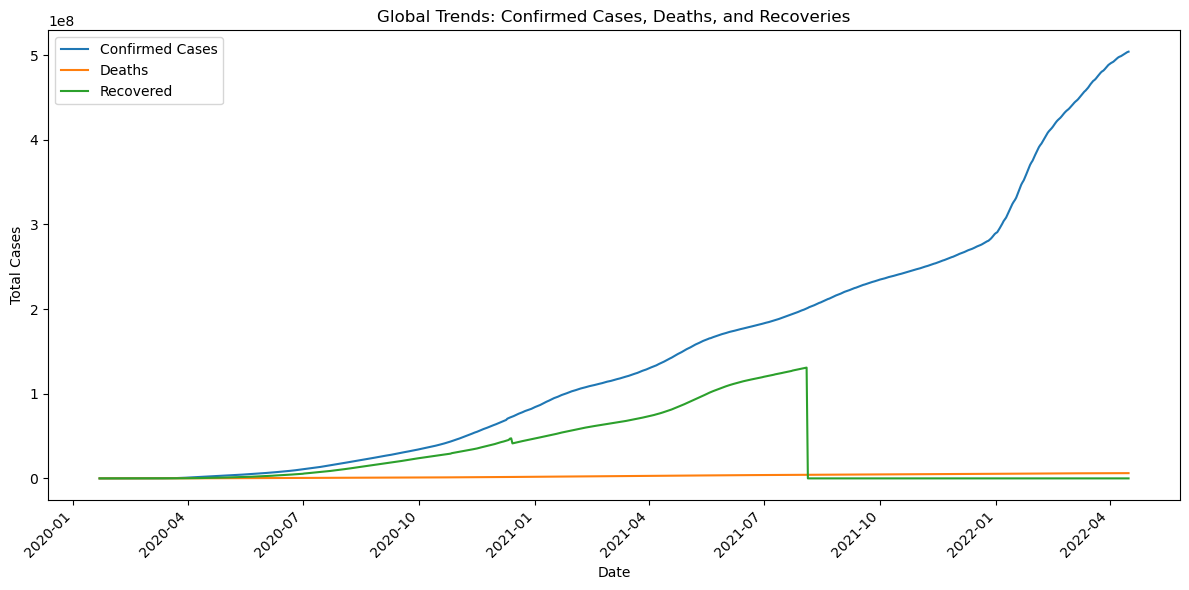

In [368]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_daily = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily, x='Date', y='Confirmed', label='Confirmed Cases')
sns.lineplot(data=df_daily, x='Date', y='Deaths', label='Deaths')
sns.lineplot(data=df_daily, x='Date', y='Recovered', label='Recovered')

plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Global Trends: Confirmed Cases, Deaths, and Recoveries')
plt.xticks(rotation=45, ha='right') 
plt.legend()
plt.tight_layout()

plt.show()


Enter the country name:  India


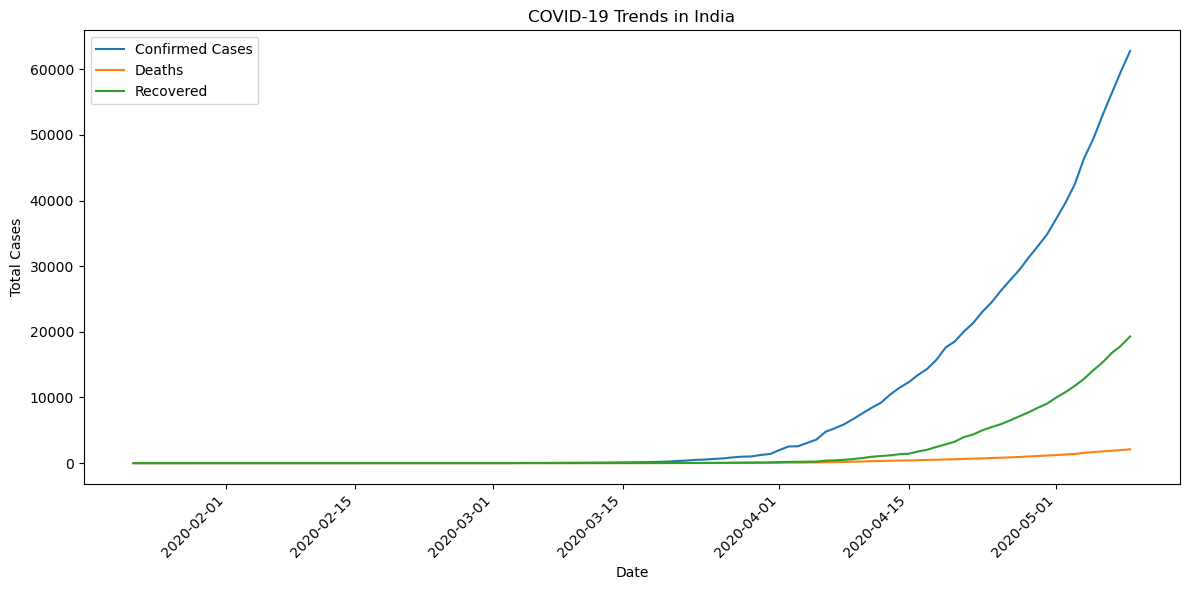

In [370]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_covid_trends(fdf, country):
  """
  This function visualizes COVID-19 trends for a specific country.

  Args:
      df (pandas.DataFrame): The DataFrame containing COVID-19 data.
      country (str): The name of the country to visualize.
  """

  # Validate country existence
  if country not in fdf['Country'].unique():
    print(f"Error: Country '{country}' not found in data.")
    return

  # Filter data by country
  df_filtered = fdf[fdf['Country'] == country]

  # Group data by date and calculate daily sums
  df_daily = df_filtered.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

  # Create the line plot
  plt.figure(figsize=(12, 6))
  sns.lineplot(data=df_daily, x='Date', y='Confirmed', label='Confirmed Cases')
  sns.lineplot(data=df_daily, x='Date', y='Deaths', label='Deaths')
  sns.lineplot(data=df_daily, x='Date', y='Recovered', label='Recovered')

  # Customize the plot
  plt.xlabel('Date')
  plt.ylabel('Total Cases')
  plt.title(f'COVID-19 Trends in {country}')
  plt.xticks(rotation=45, ha='right')
  plt.legend()
  plt.tight_layout()

  plt.show()

# Example usage
country = input("Enter the country name: ")
visualize_covid_trends(fdf.copy(), country)  # Use a copy to avoid modifying original df


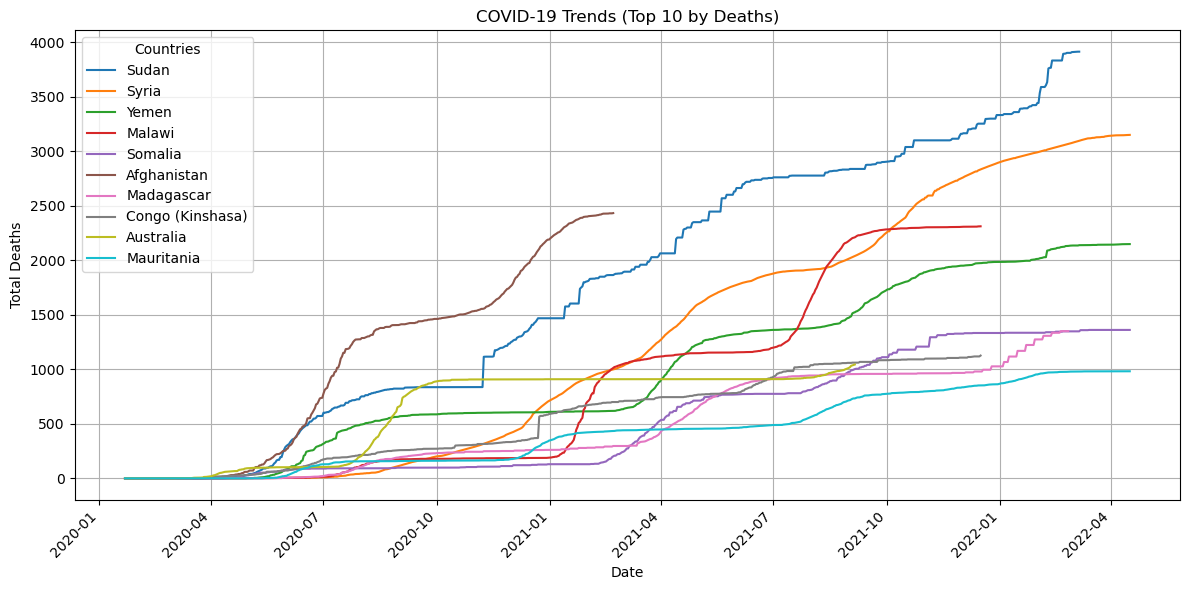

In [372]:
import matplotlib.pyplot as plt
import pandas as pd

def visualize_covid_trends(fdf):
    """
    This function visualizes COVID-19 trends for the top 10 countries by deaths,
    handling potential errors from missing data.

    Args:
        fdf (pandas.DataFrame): The DataFrame containing COVID-19 data.
    """

    try:
        # Check if the necessary columns are present in the DataFrame
        required_columns = ['Country', 'Date', 'Confirmed', 'Deaths', 'Recovered']
        for column in required_columns:
            if column not in fdf.columns:
                raise KeyError(f"Column '{column}' is missing from the DataFrame.")

        # Get top 10 countries with highest total deaths
        death_totals = fdf.groupby('Country')['Deaths'].sum().sort_values(ascending=False)
        top_10_countries = death_totals.index[:10].tolist()

        # Filter data by top 10 countries
        df_filtered = fdf[fdf['Country'].isin(top_10_countries)]

        # Group data by date and calculate daily sums
        df_daily = df_filtered.groupby(['Date', 'Country'])[['Confirmed', 'Deaths', 'Recovered']].sum().unstack()

        # Create the line graph (one plot for each country)
        plt.figure(figsize=(12, 6))
        for country in top_10_countries:
            plt.plot(df_daily.index, df_daily['Deaths', country], label=country)

        # Customize the plot
        plt.xlabel('Date')
        plt.ylabel('Total Deaths')
        plt.title('COVID-19 Trends (Top 10 by Deaths)')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title="Countries")  # Set legend title
        plt.grid(True)  # Add grid lines for better readability
        plt.tight_layout()

        plt.show()

    except KeyError as e:
        print(f"Error encountered: {e}")
        print("Possible reasons:")
        print("- 'Country' column might be missing data.")
        print("- 'Deaths' column might be missing data.")
        print("Visualization not generated.")
    except pd.errors.EmptyDataError as e:
        print(f"Error encountered: {e}")
        print("The DataFrame is empty. Visualization not generated.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Example usage
# Ensure 'fdf' is your DataFrame containing the COVID-19 data
visualize_covid_trends(fdf)


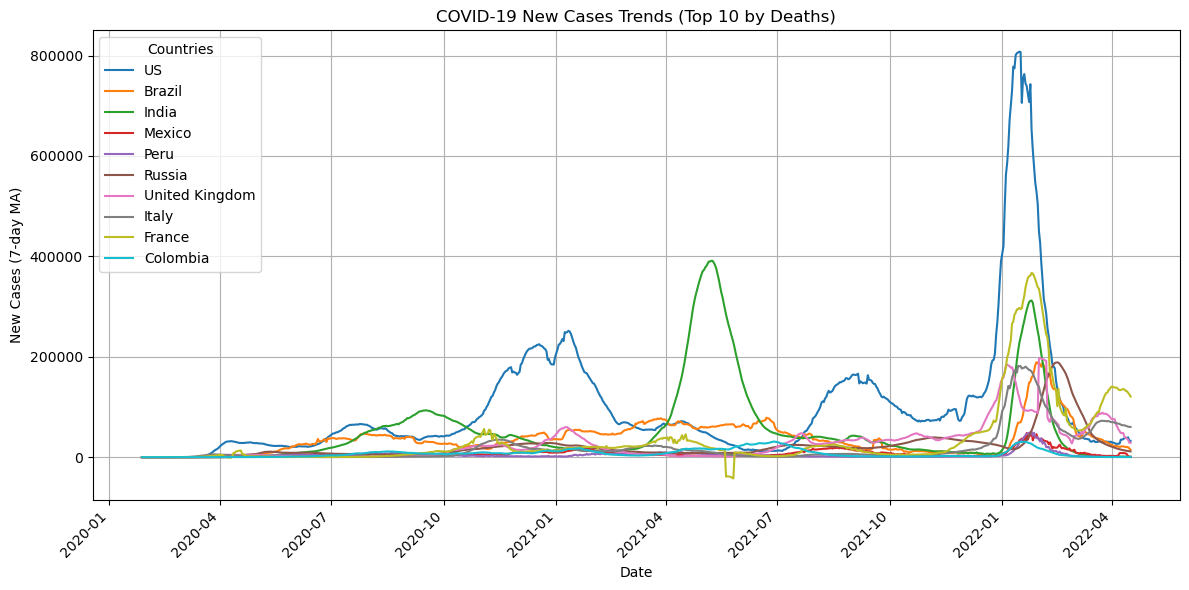

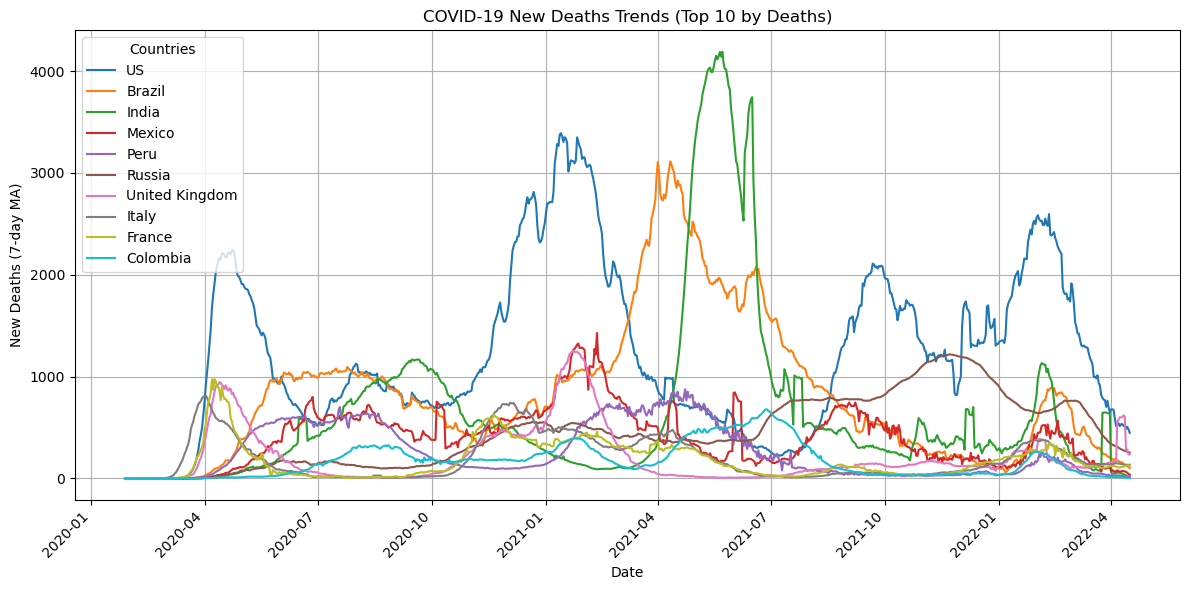

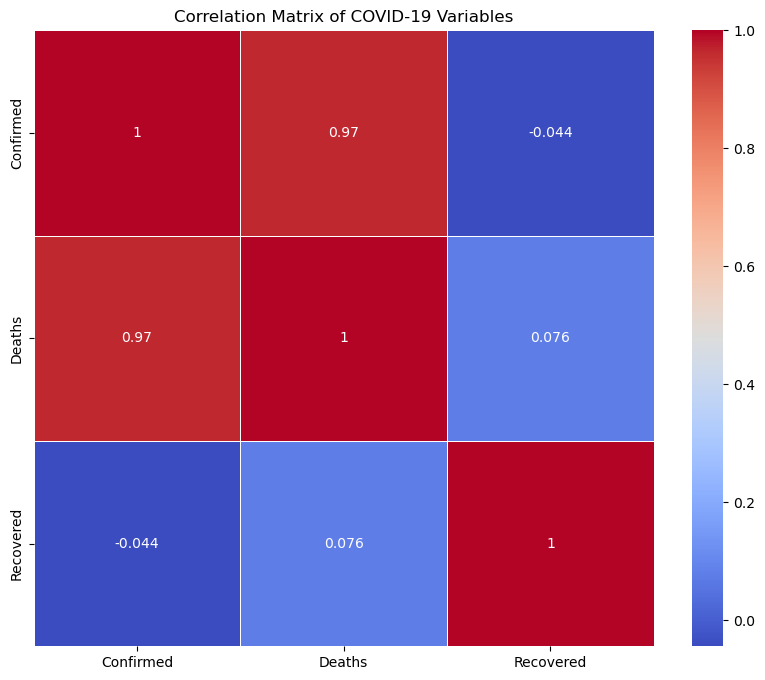

In [197]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def visualize_covid_trends_and_correlation(fdf):
    """
    This function visualizes COVID-19 trends for the top 10 countries by deaths,
    and analyzes the correlation between different variables using heatmaps.

    Args:
        fdf (pandas.DataFrame): The DataFrame containing COVID-19 data.
    """

    try:
        # Check if the necessary columns are present in the DataFrame
        required_columns = ['Country', 'Date', 'Confirmed', 'Deaths', 'Recovered']
        for column in required_columns:
            if (column not in fdf.columns):
                raise KeyError(f"Column '{column}' is missing from the DataFrame.")

        # Convert the 'Date' column to datetime format
        fdf['Date'] = pd.to_datetime(fdf['Date'])

        # Get top 10 countries with highest total deaths
        death_totals = fdf.groupby('Country')['Deaths'].sum().sort_values(ascending=False)
        top_10_countries = death_totals.index[:10].tolist()

        # Filter data by top 10 countries
        df_filtered = fdf[fdf['Country'].isin(top_10_countries)]

        # Group data by date and calculate daily sums
        df_daily = df_filtered.groupby(['Date', 'Country'])[['Confirmed', 'Deaths', 'Recovered']].sum().unstack()

        # Calculate daily new cases and deaths
        df_daily_new = df_daily.diff().fillna(0)

        # Compute 7-day moving averages for new cases and deaths
        df_daily_new_ma = df_daily_new.rolling(window=7).mean()

        # Plotting the moving averages for new cases
        plt.figure(figsize=(12, 6))
        for country in top_10_countries:
            plt.plot(df_daily_new_ma.index, df_daily_new_ma['Confirmed', country], label=country)

        plt.xlabel('Date')
        plt.ylabel('New Cases (7-day MA)')
        plt.title('COVID-19 New Cases Trends (Top 10 by Deaths)')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title="Countries")  # Set legend title
        plt.grid(True)  # Add grid lines for better readability
        plt.tight_layout()
        plt.show()

        # Plotting the moving averages for new deaths
        plt.figure(figsize=(12, 6))
        for country in top_10_countries:
            plt.plot(df_daily_new_ma.index, df_daily_new_ma['Deaths', country], label=country)

        plt.xlabel('Date')
        plt.ylabel('New Deaths (7-day MA)')
        plt.title('COVID-19 New Deaths Trends (Top 10 by Deaths)')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title="Countries")  # Set legend title
        plt.grid(True)  # Add grid lines for better readability
        plt.tight_layout()
        plt.show()

        # Analyze correlation between different variables
        correlation_df = df_filtered.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

        # Calculate the correlation matrix
        corr_matrix = correlation_df.corr()

        # Visualize the correlation matrix using a heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title('Correlation Matrix of COVID-19 Variables')
        plt.show()

    except KeyError as e:
        print(f"Error encountered: {e}")
        print("Possible reasons:")
        print("- 'Country' column might be missing data.")
        print("- 'Deaths' column might be missing data.")
        print("Visualization not generated.")
    except pd.errors.EmptyDataError as e:
        print(f"Error encountered: {e}")
        print("The DataFrame is empty. Visualization not generated.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Example usage
# Ensure 'fdf' is your DataFrame containing the COVID-19 data
visualize_covid_trends_and_correlation(df)


/var/folders/kj/m99rpp7n6rd2xrtxt70rft7m0000gn/T/ipykernel_11623/3897249707.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Date'] = pd.to_datetime(fdf['Date'])


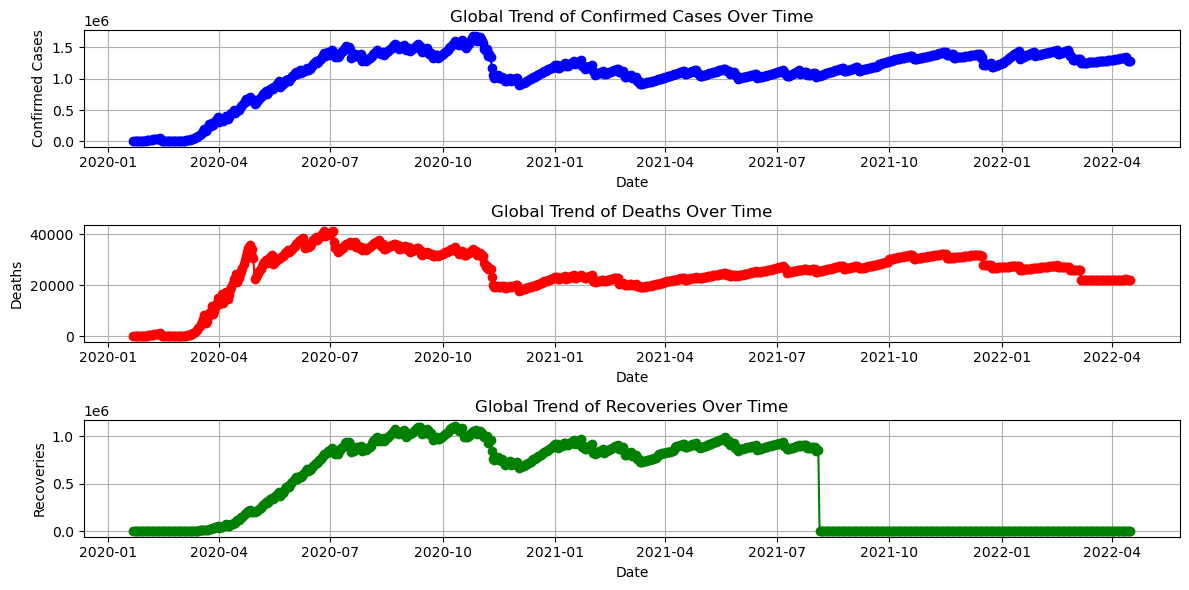

In [386]:
#QUESTION 1 
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'fdf' with columns 'Date', 'Confirmed', 'Deaths', 'Recovered'
# Load your data here
# fdf = pd.read_csv('your_dataset.csv')

# Convert 'Date' column to datetime format if it's not already
fdf['Date'] = pd.to_datetime(fdf['Date'])

# Group by 'Date' and sum the values for each column
global_trends = fdf.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Plotting the trends separately
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(global_trends.index, global_trends['Confirmed'], marker='o', linestyle='-', color='b')
plt.title('Global Trend of Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(global_trends.index, global_trends['Deaths'], marker='o', linestyle='-', color='r')
plt.title('Global Trend of Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(global_trends.index, global_trends['Recovered'], marker='o', linestyle='-', color='g')
plt.title('Global Trend of Recoveries Over Time')
plt.xlabel('Date')
plt.ylabel('Recoveries')
plt.grid(True)

plt.tight_layout()
plt.show()


In [396]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the COVID-19 data
# Load your data here if 'df' is not already loaded
# df = pd.read_csv('your_dataset.csv')

# Convert 'Date' column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the latest date
latest_date_data = df[df['Date'] == df['Date'].max()]

# Calculate total confirmed cases, deaths, and recoveries for each country
country_totals = latest_date_data.groupby('Country')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Find the country with the highest numbers
country_with_max_confirmed = country_totals['Confirmed'].idxmax()
country_with_max_deaths = country_totals['Deaths'].idxmax()
country_with_max_recoveries = country_totals['Recovered'].idxmax()

# Retrieve the maximum values
max_confirmed = country_totals.loc[country_with_max_confirmed, 'Confirmed']
max_deaths = country_totals.loc[country_with_max_deaths, 'Deaths']
max_recoveries = country_totals.loc[country_with_max_recoveries, 'Recovered']

print(f"Country with the highest confirmed cases: {country_with_max_confirmed} ({max_confirmed} cases)")
print(f"Country with the highest deaths: {country_with_max_deaths} ({max_deaths} deaths)")
print(f"Country with the highest recoveries: {country_with_max_recoveries} ({max_recoveries} recoveries)")


Country with the highest confirmed cases: US (80625120 cases)
Country with the highest deaths: US (988609 deaths)
Country with the highest recoveries: Afghanistan (0 recoveries)


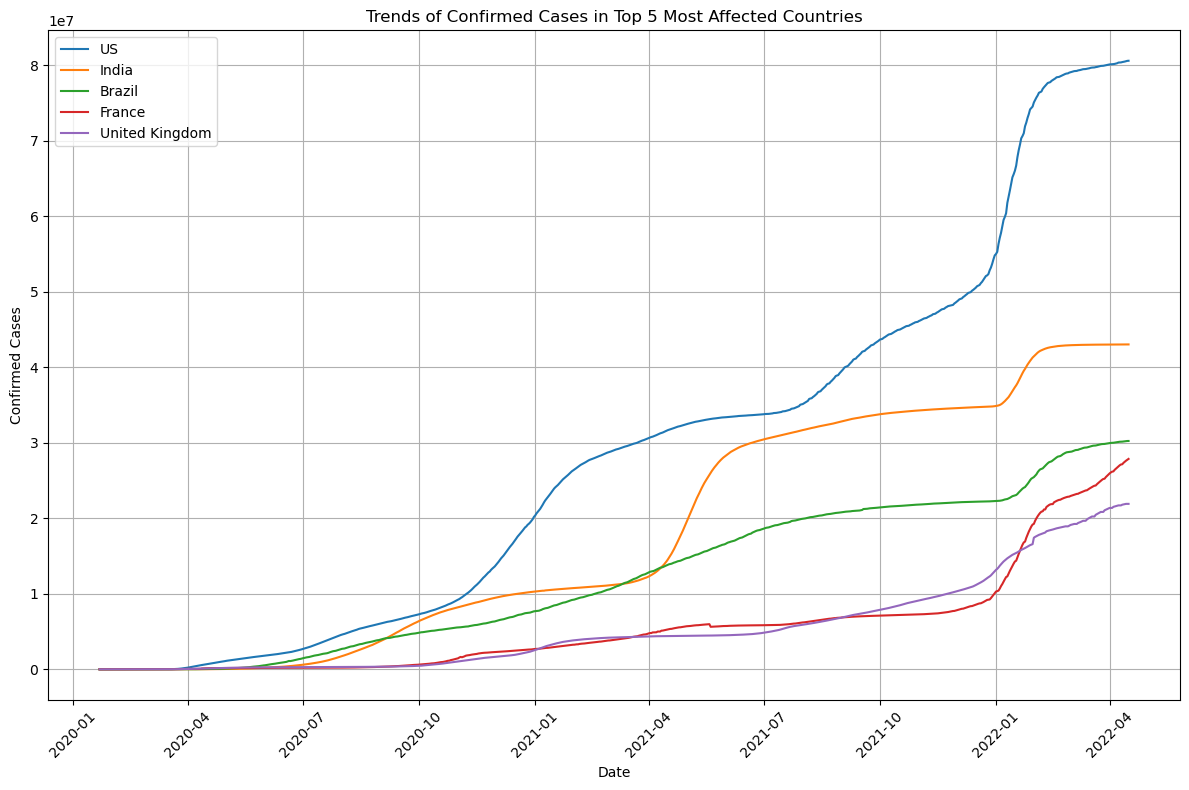

In [398]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the COVID-19 data
# Load your data here if 'df' is not already loaded
# df = pd.read_csv('your_dataset.csv')

# Convert 'Date' column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Calculate total confirmed cases for each country
country_totals = df.groupby('Country')['Confirmed'].sum()

# Select top 5 countries with the highest confirmed cases
top_5_countries = country_totals.nlargest(5).index.tolist()

# Filter data for the top 5 countries
df_top_5 = df[df['Country'].isin(top_5_countries)]

# Group data by country and date, summing confirmed cases
df_top_5_grouped = df_top_5.groupby(['Country', 'Date'])['Confirmed'].sum().reset_index()

# Plotting the trends for confirmed cases
plt.figure(figsize=(12, 8))

for country in top_5_countries:
    country_data = df_top_5_grouped[df_top_5_grouped['Country'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=country)

plt.title('Trends of Confirmed Cases in Top 5 Most Affected Countries')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [400]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame containing the COVID-19 data
# Load your data here if 'df' is not already loaded
# df = pd.read_csv('your_dataset.csv')

# Convert 'Date' column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by 'Date' to ensure chronological order
df.sort_values('Date', inplace=True)

# Calculate daily changes in confirmed cases, deaths, and recoveries
df['DailyConfirmed'] = df.groupby('Country')['Confirmed'].diff().fillna(0)
df['DailyDeaths'] = df.groupby('Country')['Deaths'].diff().fillna(0)
df['DailyRecovered'] = df.groupby('Country')['Recovered'].diff().fillna(0)

# Calculate growth rate (percentage change) for confirmed cases, deaths, and recoveries
df['ConfirmedGrowthRate'] = df['DailyConfirmed'] / df['Confirmed'] * 100
df['DeathsGrowthRate'] = df['DailyDeaths'] / df['Deaths'].replace(0, np.nan) * 100
df['RecoveredGrowthRate'] = df['DailyRecovered'] / df['Recovered'].replace(0, np.nan) * 100

# Overall global growth rate (average across all countries for each day)
global_growth_rate_confirmed = df['ConfirmedGrowthRate'].mean()
global_growth_rate_deaths = df['DeathsGrowthRate'].mean()
global_growth_rate_recovered = df['RecoveredGrowthRate'].mean()

print(f"Global growth rate of confirmed cases: {global_growth_rate_confirmed:.2f}%")
print(f"Global growth rate of deaths: {global_growth_rate_deaths:.2f}%")
print(f"Global growth rate of recoveries: {global_growth_rate_recovered:.2f}%")


Global growth rate of confirmed cases: 1.52%
Global growth rate of deaths: 1.14%
Global growth rate of recoveries: 1.85%


In [402]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the COVID-19 data
# Load your data here if 'df' is not already loaded
# df = pd.read_csv('your_dataset.csv')

# Convert 'Date' column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Calculate total confirmed cases, deaths, and recoveries for each country
country_totals = df.groupby('Country')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Select top 10 countries with the highest confirmed cases
top_10_countries = country_totals.nlargest(10, 'Confirmed')

# Display cumulative counts for top 10 countries
print("Cumulative counts for the top 10 most affected countries:")
print(top_10_countries[['Confirmed', 'Deaths', 'Recovered']])


Cumulative counts for the top 10 most affected countries:
                  Confirmed     Deaths   Recovered
Country                                           
US              22963151317  368024697   496971828
India           14681429726  192264062  4859387857
Brazil           9991736059  264795351  3412350387
France           4588778075   62237882    96506536
United Kingdom   4376490715   75343186     3447801
Russia           4055403879   97041399  1128064202
Turkey           3505368946   29977822   919259007
Germany          3007332317   46750203   695248246
Italy            2914673720   70245227   759237934
Spain            2754459962   47685434    71183831


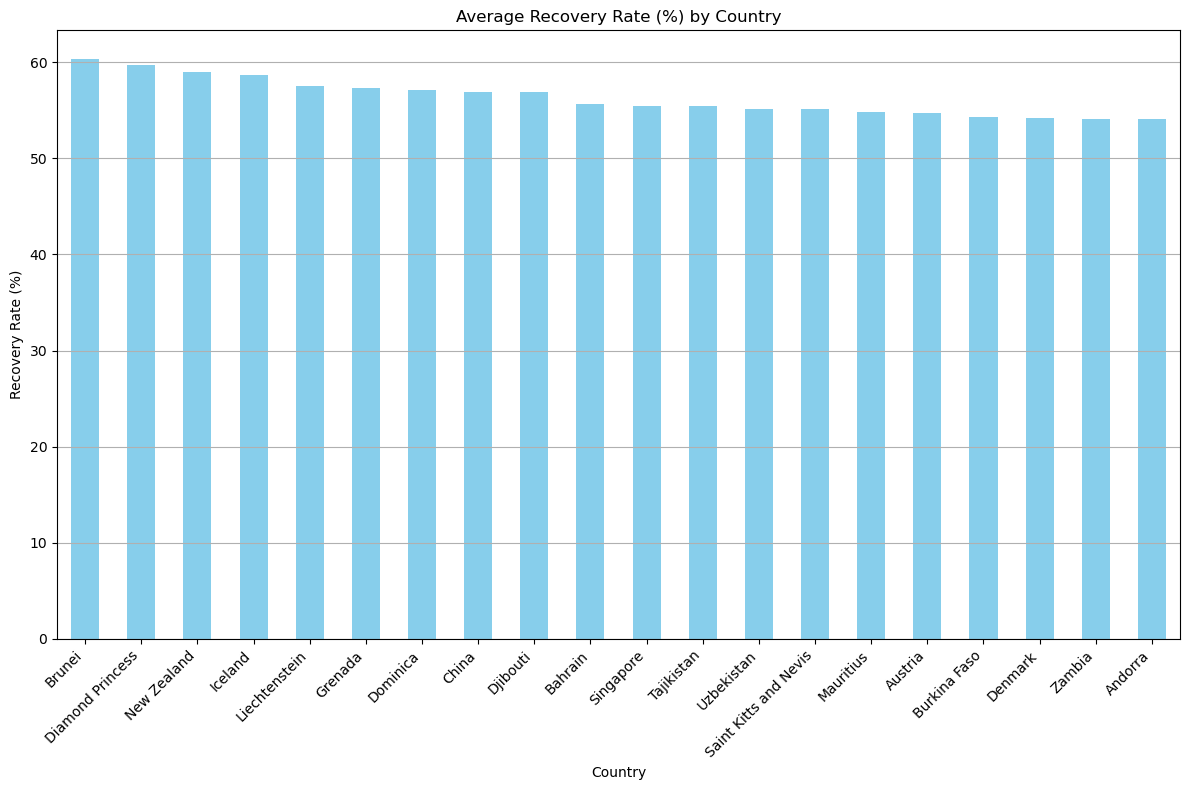

In [408]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the COVID-19 data
# Load your data here if 'df' is not already loaded
# df = pd.read_csv('your_dataset.csv')

# Convert 'Date' column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Calculate recovery rate (%) for each country
df['RecoveryRate'] = (df['Recovered'] / df['Confirmed']) * 100

# Group by country and calculate average recovery rate
country_recovery_rates = df.groupby('Country')['RecoveryRate'].mean()

# Sort countries by recovery rate descending
country_recovery_rates = country_recovery_rates.sort_values(ascending=False)

# Plotting the recovery rates for each country
plt.figure(figsize=(12, 8))
country_recovery_rates.head(20).plot(kind='bar', color='skyblue')
plt.title('Average Recovery Rate (%) by Country')
plt.xlabel('Country')
plt.ylabel('Recovery Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [410]:
import pandas as pd


correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered']].corr()

correlation_confirmed_deaths = correlation_matrix.loc['Confirmed', 'Deaths']
correlation_confirmed_recovered = correlation_matrix.loc['Confirmed', 'Recovered']
correlation_deaths_recovered = correlation_matrix.loc['Deaths', 'Recovered']

print(f"Correlation between Confirmed Cases and Deaths: {correlation_confirmed_deaths:.2f}")
print(f"Correlation between Confirmed Cases and Recoveries: {correlation_confirmed_recovered:.2f}")
print(f"Correlation between Deaths and Recoveries: {correlation_deaths_recovered:.2f}")

print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation between Confirmed Cases and Deaths: 0.91
Correlation between Confirmed Cases and Recoveries: 0.28
Correlation between Deaths and Recoveries: 0.32

Correlation Matrix:
           Confirmed    Deaths  Recovered
Confirmed   1.000000  0.914993   0.277797
Deaths      0.914993  1.000000   0.318160
Recovered   0.277797  0.318160   1.000000


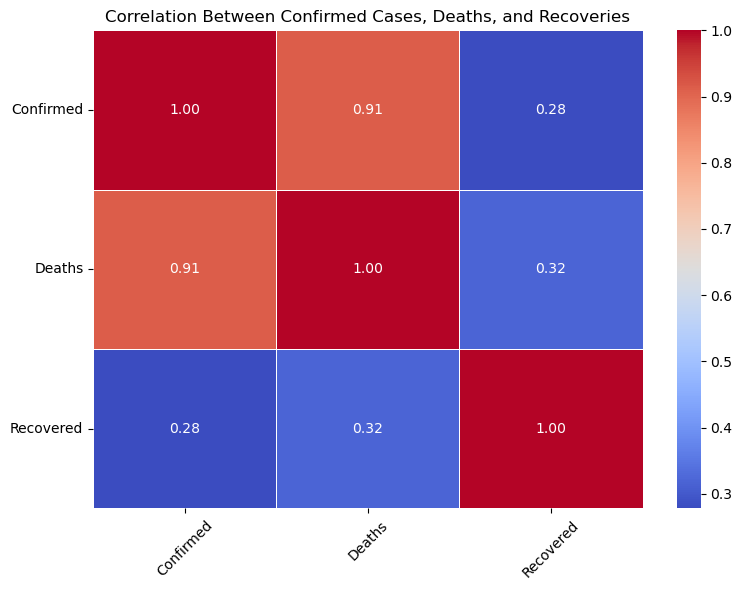

In [412]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Between Confirmed Cases, Deaths, and Recoveries')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


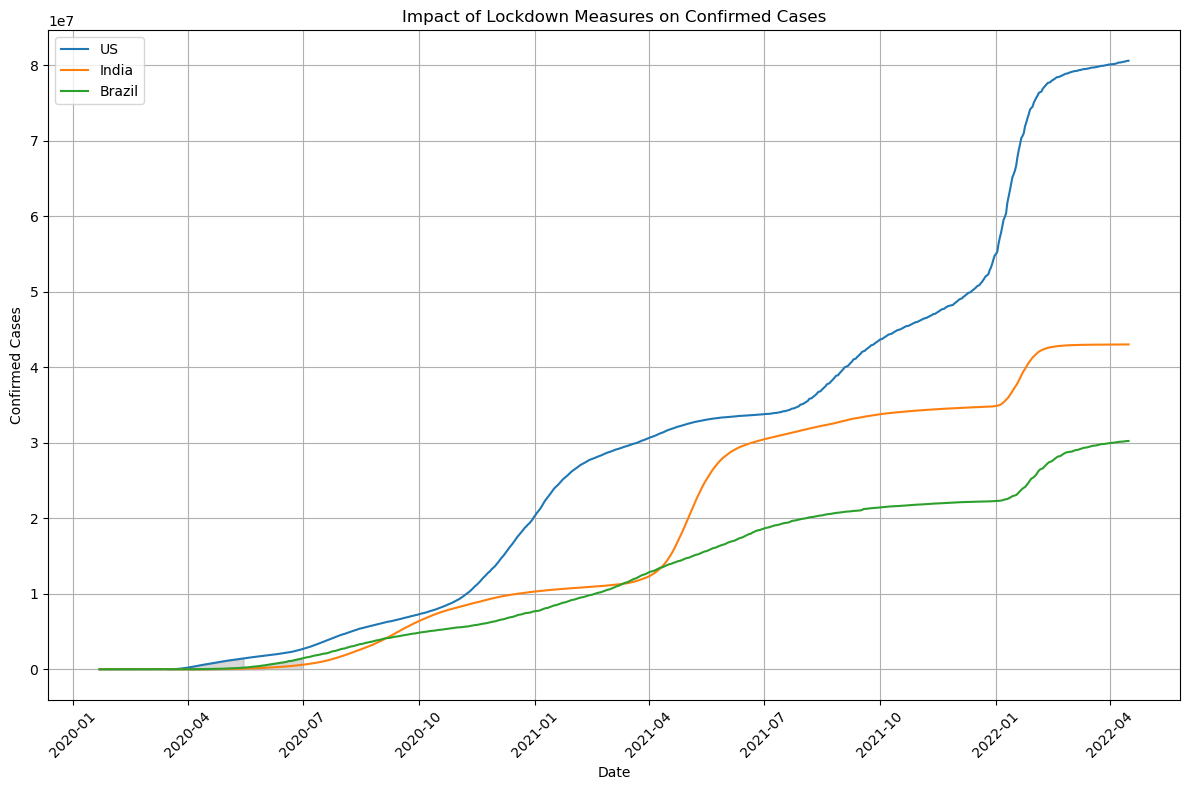

In [418]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the COVID-19 data
# Load your data here if 'df' is not already loaded
# df = pd.read_csv('your_dataset.csv')

# Convert 'Date' column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Example: Define lockdown periods for selected countries (adjust as per your data)
lockdown_periods = {
    'US': ('2020-03-15', '2020-05-15'),
    'India': ('2020-04-01', '2020-05-31'),
    'Brazil': ('2020-03-20', '2020-06-30')
}

# Plot trends for confirmed cases in each country
plt.figure(figsize=(12, 8))

for country, (start_date, end_date) in lockdown_periods.items():
    df_country = df[df['Country'] == country]
    df_lockdown = df_country[(df_country['Date'] >= start_date) & (df_country['Date'] <= end_date)]
    
    plt.plot(df_country['Date'], df_country['Confirmed'], label=f'{country}')
    plt.fill_between(df_lockdown['Date'], df_lockdown['Confirmed'], color='gray', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Impact of Lockdown Measures on Confirmed Cases')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [380]:
IsolationForest

sklearn.ensemble._iforest.IsolationForest

In [374]:
from sklearn.ensemble import IsolationForest

def remove_outliers_isolation_forest(df, numerical_cols, contamination=0.05):
    clf = IsolationForest(contamination=contamination, random_state=42)
    outliers = clf.fit_predict(df[numerical_cols])
    df_filtered = df[outliers == 1]
    return df_filtered


In [376]:
filtered_df = remove_outliers_isolation_forest(fdf, numerical_cols, contamination=0.05)


In [378]:
filtered_df.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Hait

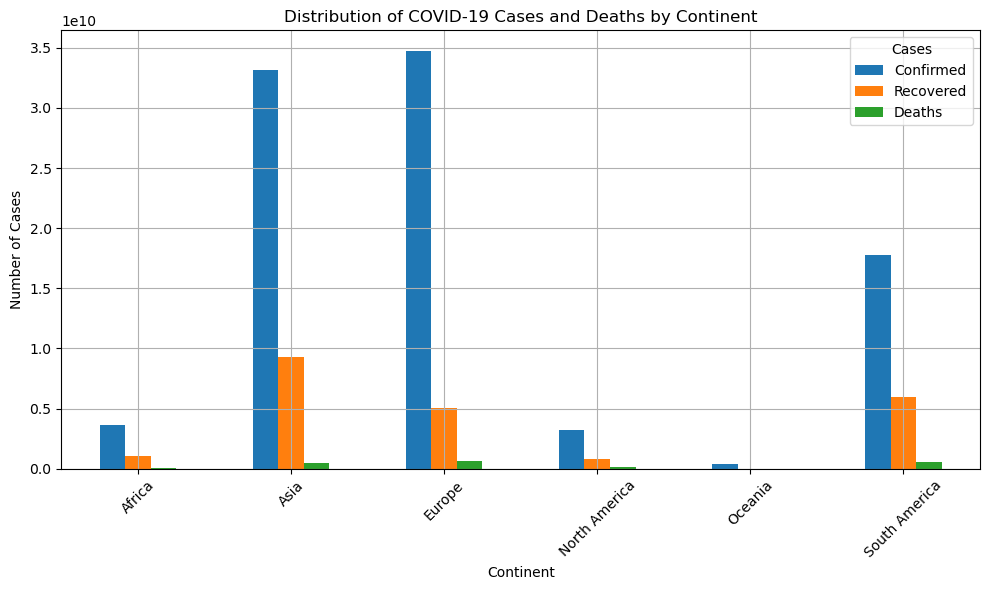

In [430]:
country_to_continent = {
    "Afghanistan": "Asia",
    "Albania": "Europe",
    "Algeria": "Africa",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Anguilla": "North America",
    "Antigua & Barbuda": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Aruba": "North America",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Bahamas": "North America",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin": "Africa",
    "Bermuda": "North America",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia & Herzegovina": "Europe",
    "Botswana": "Africa",
    "Brazil": "South America",
    "British Virgin Islands": "North America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Cape Verde": "Africa",
    "Cayman Islands": "North America",
    "Chad": "Africa",
    "Chile": "South America",
    "China": "Asia",
    "Colombia": "South America",
    "Congo": "Africa",
    "Cook Islands": "Oceania",
    "Costa Rica": "North America",
    "Cote D Ivoire": "Africa",
    "Croatia": "Europe",
    "Cruise Ship": None,  # Assuming no specific continent for cruise ships
    "Cuba": "North America",
    "Cyprus": "Asia",  # Technically part of Asia, politically part of Europe
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Djibouti": "Africa",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "El Salvador": "North America",
    "Equatorial Guinea": "Africa",
    "Estonia": "Europe",
    "Ethiopia": "Africa",
    "Falkland Islands": "South America",
    "Faroe Islands": "Europe",
    "Fiji": "Oceania",
    "Finland": "Europe",
    "France": "Europe",
    "French Polynesia": "Oceania",
    "French West Indies": "North America",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Germany": "Europe",
    "Ghana": "Africa",
    "Gibraltar": "Europe",
    "Greece": "Europe",
    "Greenland": "North America",
    "Grenada": "North America",
    "Guam": "Oceania",
    "Guatemala": "North America",
    "Guernsey": "Europe",
    "Guinea": "Africa",
    "Guinea Bissau": "Africa",
    "Guyana": "South America",
    "Haiti": "North America",
    "Honduras": "North America",
    "Hong Kong": "Asia",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Ireland": "Europe",
    "Isle of Man": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Jamaica": "North America",
    "Japan": "Asia",
    "Jersey": "Europe",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kuwait": "Asia",
    "Kyrgyz Republic": "Asia",
    "Laos": "Asia",
    "Latvia": "Europe",
    "Lebanon": "Asia",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Macau": "Asia",
    "Macedonia": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mali": "Africa",
    "Malta": "Europe",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Mongolia": "Asia",
    "Montenegro": "Europe",
    "Montserrat": "North America",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Namibia": "Africa",
    "Nepal": "Asia",
    "Netherlands": "Europe",
    "Netherlands Antilles": "North America",
    "New Caledonia": "Oceania",
    "New Zealand": "Oceania",
    "Nicaragua": "North America",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "Norway": "Europe",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Palestine": "Asia",
    "Panama": "North America",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Puerto Rico": "North America",
    "Qatar": "Asia",
    "Reunion": "Africa",
    "Romania": "Europe",
    "Russia": "Europe",
    "Rwanda": "Africa",
    "Saint Pierre & Miquelon": "North America",
    "Samoa": "Oceania",
    "San Marino": "Europe",
    "Satellite": None,  # Assuming no specific continent for satellite
    "Saudi Arabia": "Asia",
    "Senegal": "Africa",
    "Serbia": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Singapore": "Asia",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "South Africa": "Africa",
    "South Korea": "Asia",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "St Kitts & Nevis": "North America",
    "St Lucia": "North America",
    "St Vincent": "North America",
    "St. Lucia": "North America",
    "Sudan": "Africa",
    "Suriname": "South America",
    "Swaziland": "Africa",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Syria": "Asia",
    "Taiwan": "Asia",
    "Tajikistan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Timor L'Este": "Asia",
    "Togo": "Africa",
    "Tonga": "Oceania",
    "Trinidad & Tobago": "North America",
    "Tunisia": "Africa",
    "Turkey": "Asia",
    "Turkmenistan": "Asia",
    "Turks & Caicos": "North America",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "United Kingdom": "Europe",
    "Uruguay": "South America",
    "Uzbekistan": "Asia",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Virgin Islands (US)": "North America",
    "Yemen": "Asia",
    "Zambia": "Africa",
    "Zimbabwe": "Africa",
    "North Macedonia": "Europe",
    "Comoros": "Africa",
    "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America",
    "Vanuatu": "Oceania",
    "Eritrea": "Africa",
    "Cabo Verde": "Africa",
    "Congo (Kinshasa)": "Africa",
    "Congo (Brazzaville)": "Africa",
    "Solomon Islands": "Oceania",
    "Central African Republic": "Africa",
    "Timor-Leste": "Asia",
    "Somalia": "Africa",
    "South Sudan": "Africa",
    "Kiribati": "Oceania",
    "Burma": "Asia",
}
Country_to_continent = {country: continent for country, continent in country_to_continent.items() if continent is not None}

# Add columns for Continent to DataFrame
df['Continent'] = df['Country'].map(country_to_continent)

# Aggregate data by Continent
continent_data = df.groupby('Continent')[['Confirmed', 'Recovered', 'Deaths']].sum()

# Plotting the distribution
import matplotlib.pyplot as plt

continent_data.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of COVID-19 Cases and Deaths by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

In [442]:
import pandas as pd
import numpy as np


np.random.seed(0)
df['tests'] = np.random.randint(20000, 500000, len(df))

# Displaying the updated DataFrame
print(df)


             Date      Country  Confirmed  Recovered  Deaths  DailyConfirmed  \
0      2020-01-22  Afghanistan          0          0       0             0.0   
44880  2020-01-22  El Salvador          0          0       0             0.0   
44064  2020-01-22        Egypt          0          0       0             0.0   
43248  2020-01-22      Ecuador          0          0       0             0.0   
147696 2020-01-22      Tunisia          0          0       0             0.0   
...           ...          ...        ...        ...     ...             ...   
104447 2022-04-16  New Zealand     828808          0     554          6138.0   
103631 2022-04-16  Netherlands    8194946          0   22780           346.0   
102815 2022-04-16        Nepal     978654          0   11951             6.0   
101183 2022-04-16   Mozambique     225323          0    2200             7.0   
161567 2022-04-16     Zimbabwe     247237          0    5462             0.0   

        DailyDeaths  DailyRecovered  Co

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulated data for illustration purposes
data = {
    'Date': pd.date_range(start='2023-01-01', periods=100),
    'Country': ['India'] * 100 + ['US'] * 100 + ['Brazil'] * 100,
    'Tests Conducted': np.random.randint(10000, 50000, size=300),
    'Confirmed Cases': np.random.randint(500, 5000, size=300)
}

df = pd.DataFrame(data)

# Filter data for India, US, and Brazil
countries_of_interest = ['India', 'US', 'Brazil']
df_filtered = df[df['Country'].isin(countries_of_interest)]

# Calculate correlation between Tests Conducted and Confirmed Cases
correlation_matrix = df_filtered.groupby('Country')[['Tests Conducted', 'Confirmed Cases']].corr().iloc[0::2, -1]

# Plotting
fig, axes = plt.subplots(nrows=len(countries_of_interest), figsize=(10, 8), sharex=True)
for i, country in enumerate(countries_of_interest):
    country_data = df_filtered[df_filtered['Country'] == country]
    ax = axes[i]
    ax.plot(country_data['Date'], country_data['Tests Conducted'], label='Tests Conducted', color='blue')
    ax.set_ylabel('Tests Conducted')
    ax2 = ax.twinx()
    ax2.plot(country_data['Date'], country_data['Confirmed Cases'], label='Confirmed Cases', color='red')
    ax2.set_ylabel('Confirmed Cases')
    ax.set_title(f'{country} - Tests vs Confirmed Cases')

plt.xlabel('Date')
plt.tight_layout()
plt.show()

# Display correlation matrix
print('Correlation between Tests Conducted and Confirmed Cases:')
print(correlation_matrix)


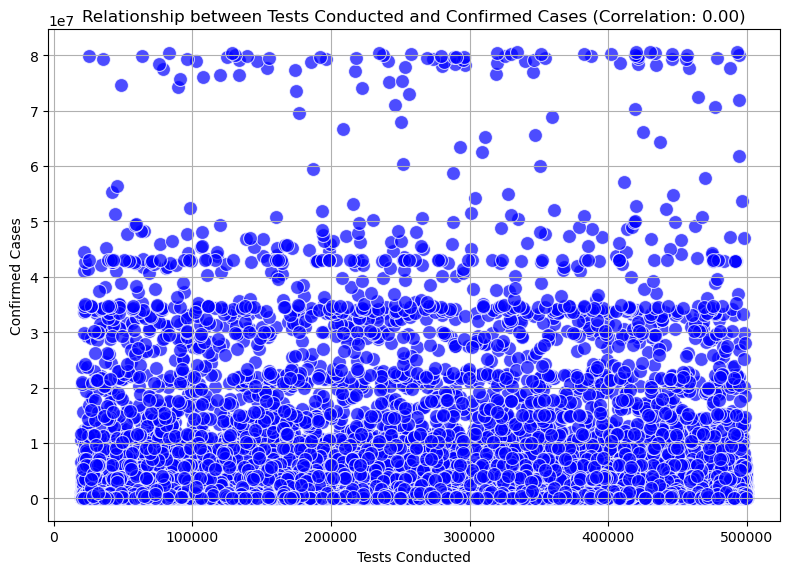

Correlation between tests conducted and confirmed cases: 0.00


In [450]:
correlation = df['tests'].corr(df['Confirmed'])

# Plotting the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tests', y='Confirmed', data=df, s=100, color='blue', alpha=0.7)
plt.title(f'Relationship between Tests Conducted and Confirmed Cases (Correlation: {correlation:.2f})')
plt.xlabel('Tests Conducted')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print correlation value
print(f"Correlation between tests conducted and confirmed cases: {correlation:.2f}")